# IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.getcwd()

'C:\\Users\\Hp'

In [3]:
os.chdir('C:\\Users\\Hp\\Downloads\\Project-Housing\\Project-Housing_splitted')

In [4]:
df=pd.read_csv("train.csv")    #importing the training dataset

In [5]:
df1=pd.read_csv("test.csv")        #importing the testing dataset

In [6]:
df     #loading the training dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [7]:
df1           #loading the testing dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal


#checking the first 5 rows of training dataset

In [8]:
df.head()        #checking the first 5 rows of training dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [9]:
df.tail()        #checking the last 5 rows of training dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
1167,617,60,RL,NaN,7861,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,183200


In [10]:
df.sample(20)   #checking some random rows of the training dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
229,909,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
51,1329,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,1150,6,2008,WD,Normal,256000
779,178,50,RL,NaN,13650,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,172500
170,547,50,RL,70.0,8737,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,210000
628,1127,120,RL,53.0,3684,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,174000
692,204,120,RM,NaN,4438,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,149000
804,292,190,RL,55.0,5687,Pave,Grvl,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,135900
627,1437,20,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2007,WD,Normal,120500
684,601,60,RL,74.0,10927,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,275000
52,1101,30,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,1,2009,WD,Normal,60000


In [11]:
df.shape              #getting the shape of training dataset

(1168, 81)

There are 1168 rows and 81 columns present in the training dataset.

In [12]:
df.columns            #looking for the columns present in the training dataset

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
df.dtypes  #looking at the dtypes of columns in dataset

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [14]:
df.info()     #getting the info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

There are 3 columns having float64 as dtype, 35 having int64 as dtype and 43 having object as dtype.

In [15]:
df.isnull().sum()          #checking for nullvalues in the training dataset

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

There are columns present in training dataset having null values.

In [16]:
df.nunique()            #looking for unique values present in training dataset

Id               1168
MSSubClass         15
MSZoning            5
LotFrontage       106
LotArea           892
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         581
Length: 81, dtype: int64

In [17]:
df1.head()                 #looking at the first 5 rows of testing dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [18]:
df1.tail()                 #looking at the last 5 rows of testing dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal
291,1379,160,RM,21.0,1953,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal


In [19]:
df1.sample(10)                        #looking at the random rows of testing dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
175,162,60,RL,110.0,13688,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal
146,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
137,491,160,RM,NaN,2665,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal
216,722,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
147,1371,50,RL,90.0,5400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal
279,528,60,RL,67.0,14948,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2008,New,Partial
209,1089,160,RM,24.0,2522,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
118,214,20,RL,43.0,13568,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
28,1421,60,RL,90.0,11700,Pave,NaN,Reg,Lvl,AllPub,...,119,0,NaN,NaN,NaN,0,5,2006,WD,Normal
29,999,30,RM,60.0,9786,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal


In [20]:
df1.shape          #getting the shape of testing dataset.

(292, 80)

There are 292 rows and 80 columns present in the testing dataset.

In [21]:
df1.columns          #getting the columns present in the testing dataset.

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [22]:
df1.info()             #getting the info of the testing dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

 There are 4 columns having float64 as dtype, 34 having int64 as dtype and 42 having object as dtype.

In [23]:
df1.isnull().sum()            #checking for the nullvalues in the testing dataset.

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

Null values are also present in the testing datatset.

# COMBINING THE TRAINING AND TESTING DATASET SO THAT IT WILL BE EASY FOR EDA.

In [24]:
df["dataset_type"]="Train"
df1["dataset_type"]="Test"

In [25]:
df_concat=pd.concat([df,df1],ignore_index=True)

In [26]:
df_concat.shape

(1460, 82)

In [27]:
df_concat["dataset_type"].value_counts()

Train    1168
Test      292
Name: dataset_type, dtype: int64

In [28]:
df_concat.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         581
dataset_type        2
Length: 82, dtype: int64

In [29]:
df_concat.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
dataset_type      object
Length: 82, dtype: object

In [30]:
df_concat.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,dataset_type
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2007,WD,Normal,128000.0,Train
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,10,2007,WD,Normal,268000.0,Train
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2007,WD,Normal,269790.0,Train
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000.0,Train
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2009,WD,Normal,215000.0,Train


In [31]:
df_concat.isnull().sum()[df_concat.isnull().sum()>0]     #checking for the null values in the concatenated dataset

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
SalePrice        292
dtype: int64

# FIXING THE NULL VALUES BY SEPARATING THE DTYPES

In [32]:
df_concat.select_dtypes(include='object').isnull().sum()[df_concat.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [33]:
df_concat.select_dtypes(include=['int64','float']).isnull().sum()[df_concat.select_dtypes(include=['int64','float']).isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
SalePrice      292
dtype: int64

In [34]:
df_concat['LotFrontage'].value_counts().sum()

1201

In [35]:
df_concat['LotFrontage'].median()

69.0

In [36]:
df_concat['MasVnrArea'].median()

0.0

In [37]:
df_concat['LotFrontage']=df_concat['LotFrontage'].replace(np.nan, df_concat['LotFrontage'].median())
df_concat['MasVnrArea']=df_concat['MasVnrArea'].replace(np.nan, df_concat['MasVnrArea'].median())

In [38]:
df_concat['GarageYrBlt']=df_concat['GarageYrBlt'].fillna(0)
df_concat['GarageYrBlt']=df_concat['GarageYrBlt'].astype(int)

In [39]:
print(df_concat.Alley.value_counts())
print('')
print(df_concat.Street.value_counts())
print(" ")
print(df_concat.Utilities.value_counts())

Grvl    50
Pave    41
Name: Alley, dtype: int64

Pave    1454
Grvl       6
Name: Street, dtype: int64
 
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


In [40]:
df_concat=df_concat.drop(['Alley','Street','Utilities','PoolQC','Fence','MiscFeature','Id'],axis='columns')

Removing the columns from the dataset having more than 90% is one sided.

In [41]:
df_concat.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [42]:
df_concat.MasVnrType.fillna('None',inplace=True)
df_concat.BsmtQual.fillna('TA',inplace=True)
df_concat.BsmtCond.fillna('TA',inplace=True)
df_concat.BsmtExposure.fillna('No',inplace=True)
df_concat.BsmtFinType1.fillna('Unf',inplace=True)
df_concat.BsmtFinType2.fillna('Unf',inplace=True)
df_concat.GarageType.fillna('Attchd',inplace=True)
df_concat.GarageFinish.fillna('Unf',inplace=True)
df_concat.GarageQual.fillna('TA',inplace=True)
df_concat.GarageCond.fillna('TA',inplace=True)
df_concat.Electrical.fillna('SBrkr',inplace=True)
df_concat.FireplaceQu.fillna('Gd',inplace=True)

In [43]:
df_concat.select_dtypes(include='object').isnull().sum()[df_concat.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

In [44]:
df_concat[df_concat.duplicated(keep=False)]       #removing the duplicate values

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,dataset_type


In [45]:
df_concat.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,dataset_type
0,120,RL,69.0,4928,IR1,Lvl,Inside,Gtl,NPkVill,Norm,...,0,0,0,0,2,2007,WD,Normal,128000.0,Train
1,20,RL,95.0,15865,IR1,Lvl,Inside,Mod,NAmes,Norm,...,0,224,0,0,10,2007,WD,Normal,268000.0,Train
2,60,RL,92.0,9920,IR1,Lvl,CulDSac,Gtl,NoRidge,Norm,...,0,0,0,0,6,2007,WD,Normal,269790.0,Train
3,20,RL,105.0,11751,IR1,Lvl,Inside,Gtl,NWAmes,Norm,...,0,0,0,0,1,2010,COD,Normal,190000.0,Train
4,20,RL,69.0,16635,IR1,Lvl,FR2,Gtl,NWAmes,Norm,...,0,0,0,0,6,2009,WD,Normal,215000.0,Train


# EXPLORATORY DATA ANALYSIS

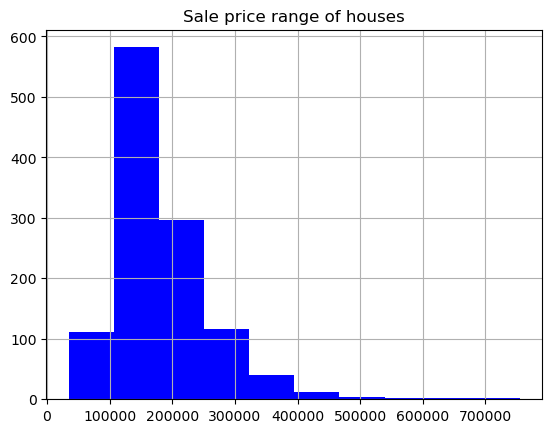

In [46]:
df["SalePrice"].hist(grid=True,color='blue')
plt.title("Sale price range of houses")
plt.show()

755000 is the max value of sales price.

<AxesSubplot:xlabel='YrSold', ylabel='count'>

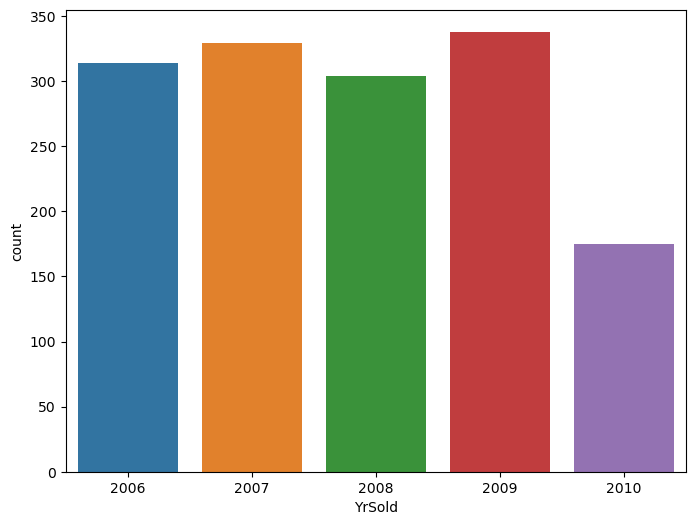

In [47]:
plt.subplots(figsize=(8,6))
sns.countplot(df_concat['YrSold'])

The number of sales in the year 2009 is having the maxium number of sales.

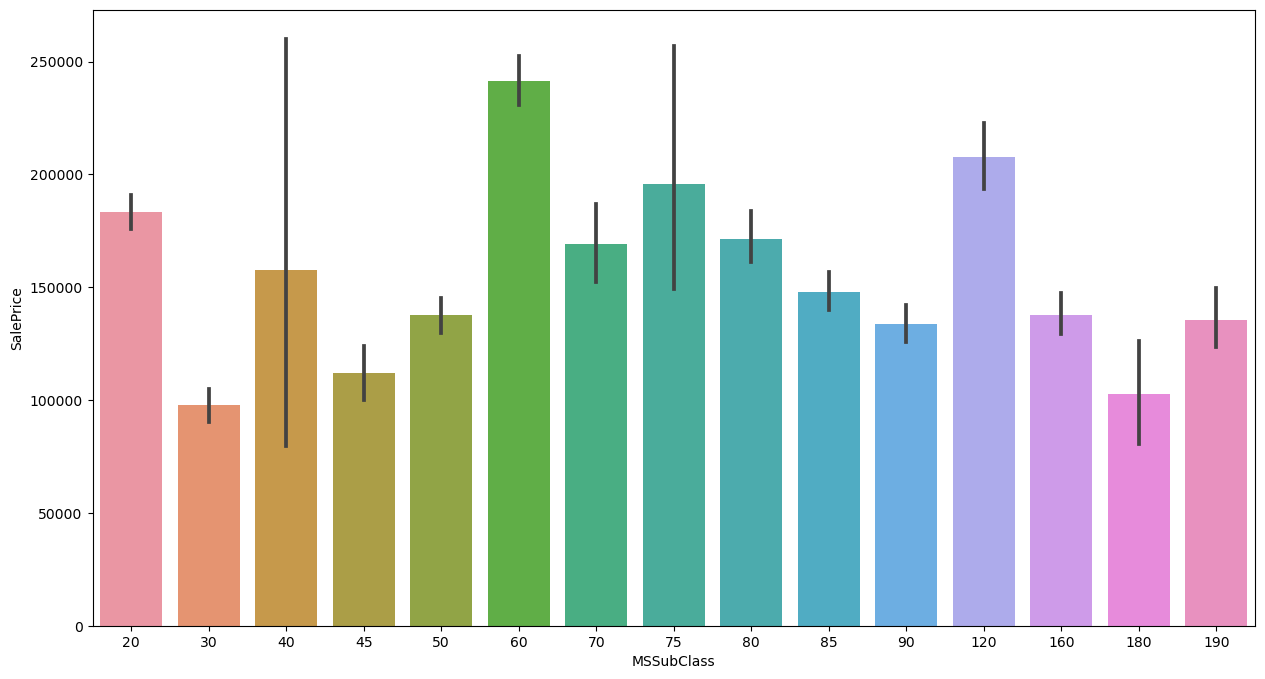

In [48]:
plt.figure(figsize=(15,8))
sns.barplot(x="MSSubClass",y="SalePrice",data=df_concat)
#plt.xticks(rotation=90)
plt.show()

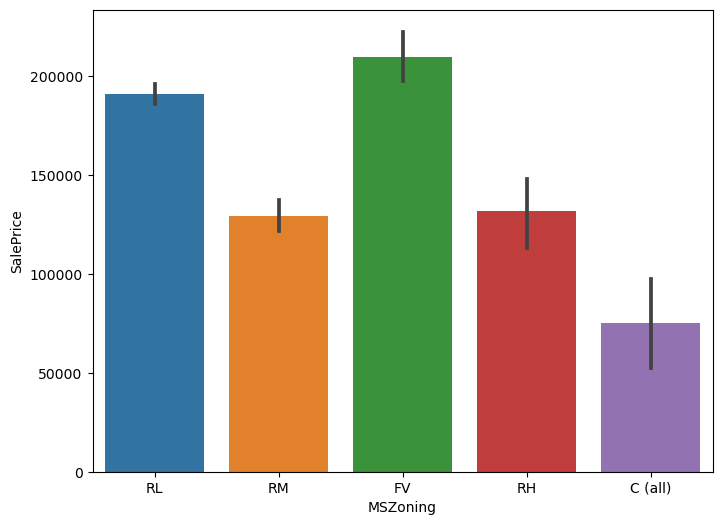

In [49]:
plt.figure(figsize=(8,6))
sns.barplot(x="MSZoning",y="SalePrice",data=df_concat)
plt.show()

Floating Village Residential (FV) has the higher value of sales.

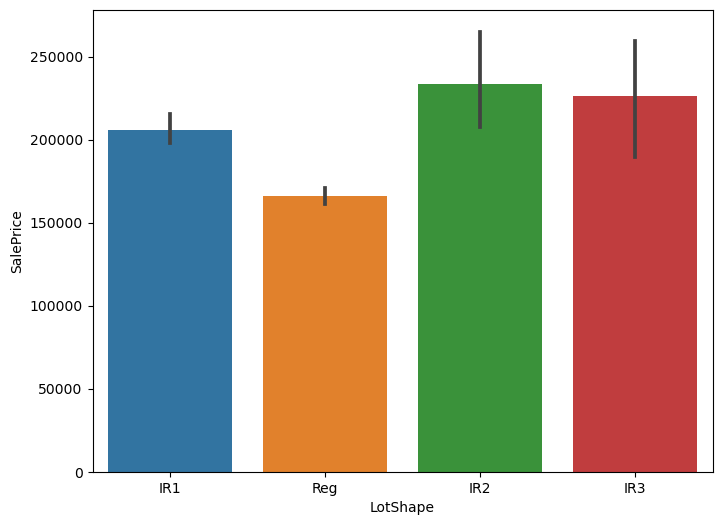

In [50]:
plt.figure(figsize=(8,6))
sns.barplot(x="LotShape",y="SalePrice",data=df_concat)
plt.show()

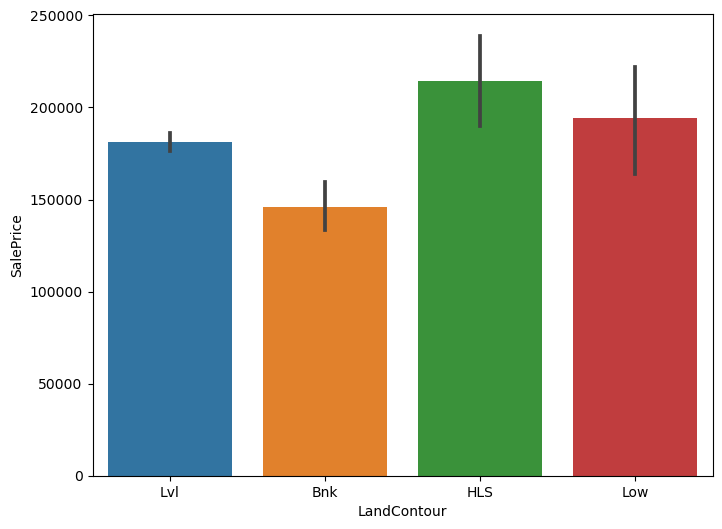

In [51]:
plt.figure(figsize=(8,6))
sns.barplot(x="LandContour",y="SalePrice",data=df_concat)
plt.show()

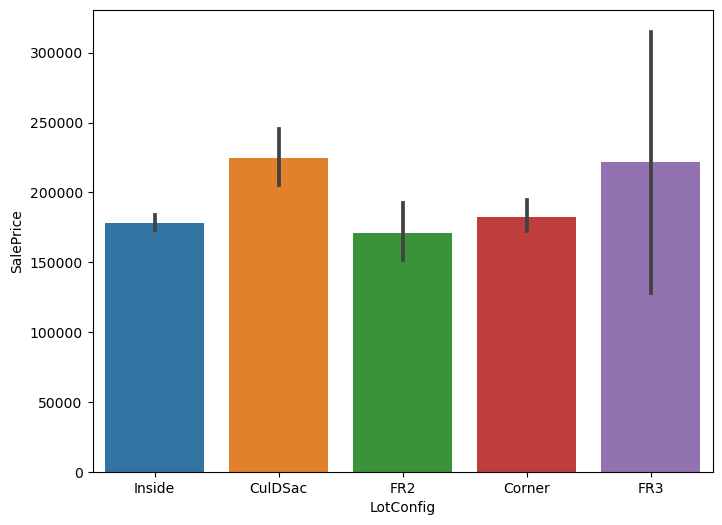

In [52]:
plt.figure(figsize=(8,6))
sns.barplot(x="LotConfig",y="SalePrice",data=df_concat)
plt.show()

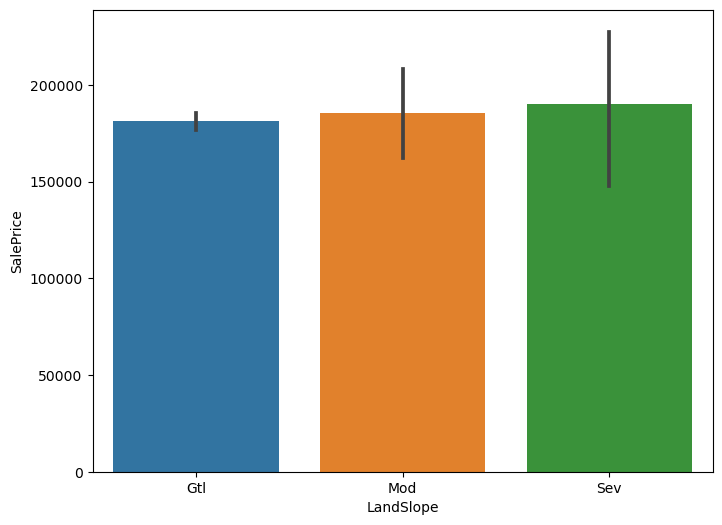

In [53]:
plt.figure(figsize=(8,6))
sns.barplot(x="LandSlope",y="SalePrice",data=df_concat)
plt.show()

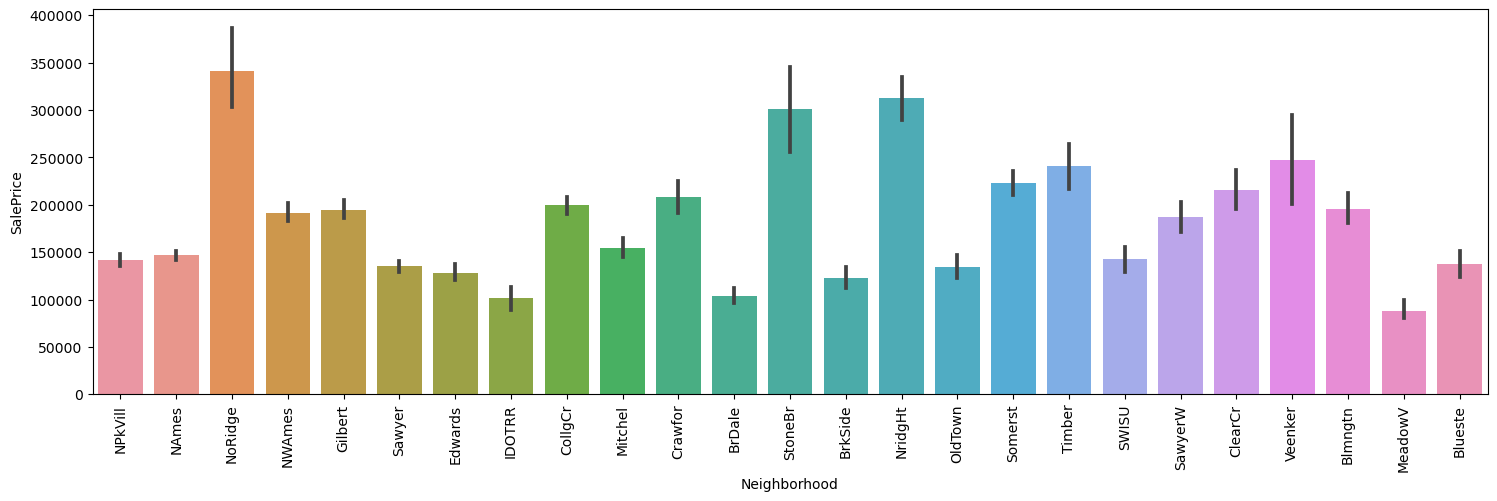

In [54]:
plt.figure(figsize=(18,5))
sns.barplot(x="Neighborhood",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

 North Ridge is the Physical locations within Ames city limits has the higher count of saleS Price.

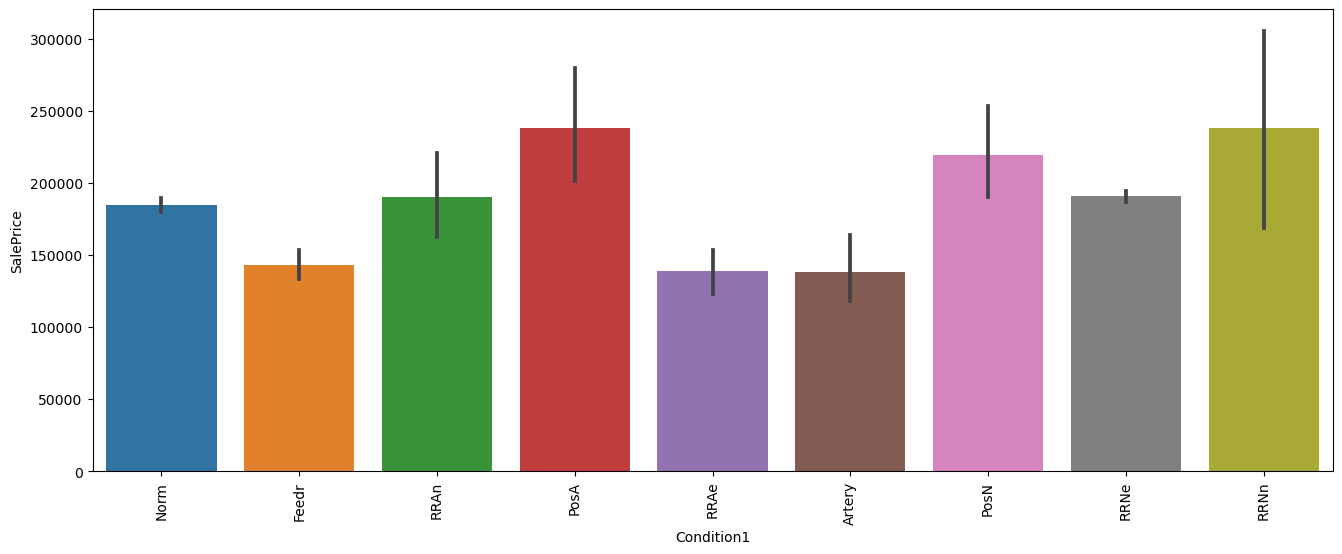

In [55]:
plt.figure(figsize=(16,6))
sns.barplot(x="Condition1",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

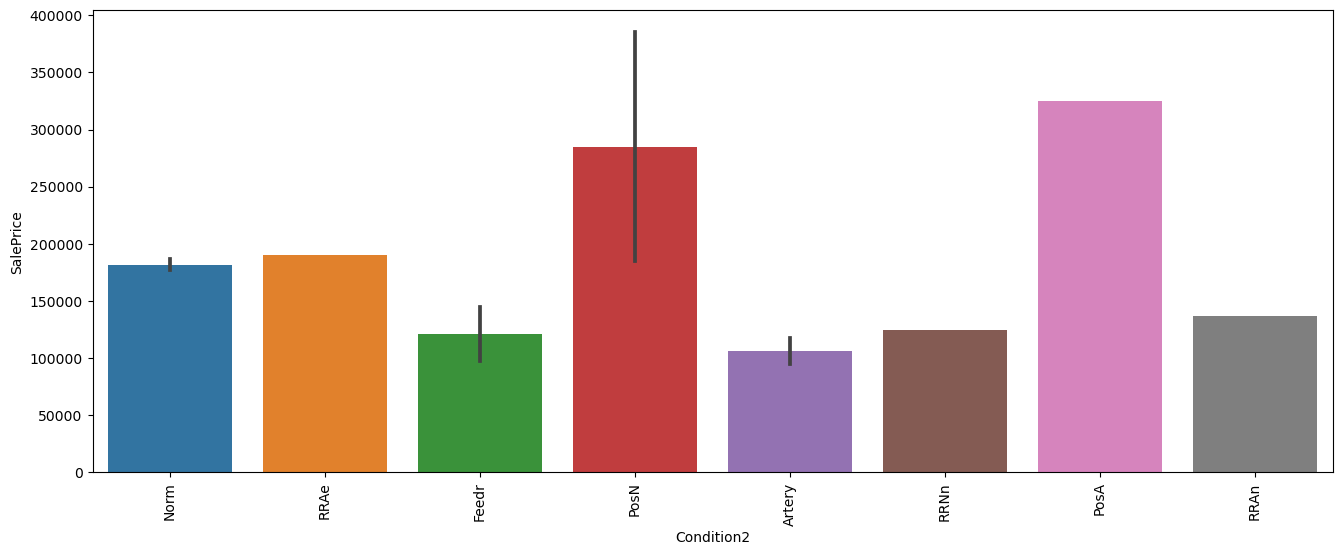

In [56]:
plt.figure(figsize=(16,6))
sns.barplot(x="Condition2",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

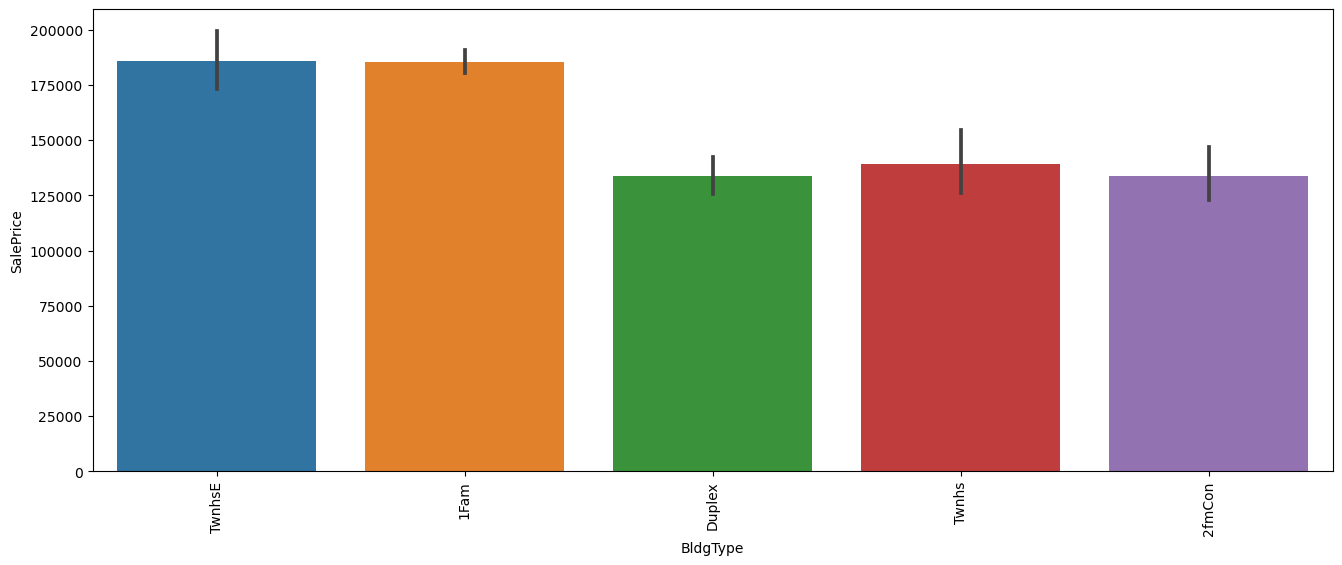

In [57]:
plt.figure(figsize=(16,6))
sns.barplot(x="BldgType",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

TwnhsE Townhouse End Unit 1Fam Single-family Detached are the one which has higher rates of sales.

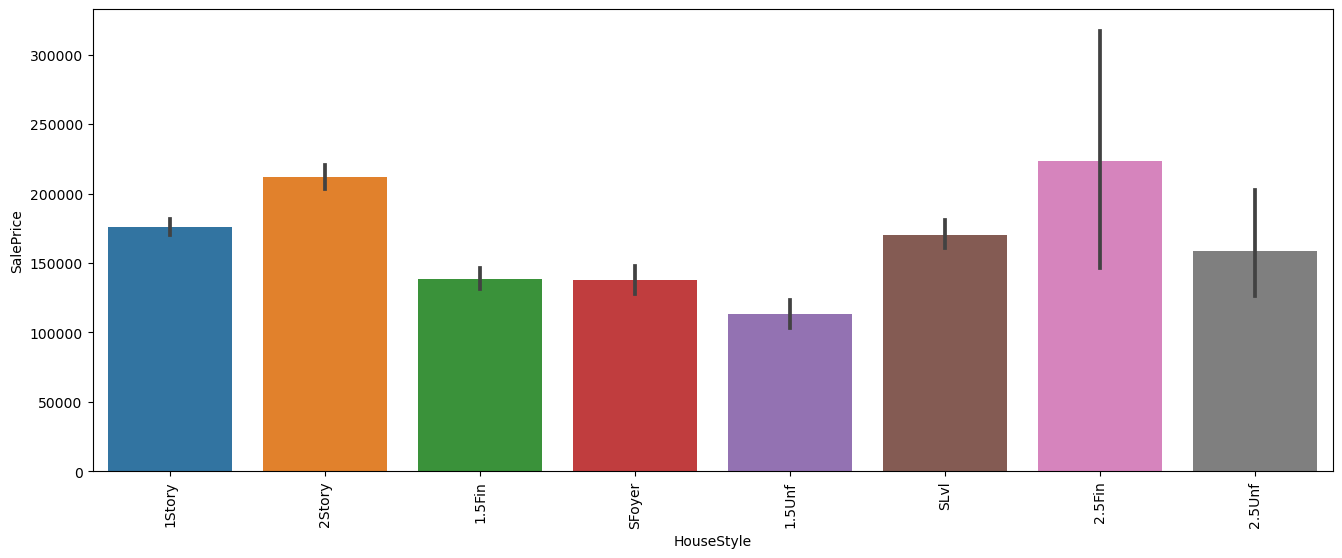

In [58]:
plt.figure(figsize=(16,6))
sns.barplot(x="HouseStyle",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

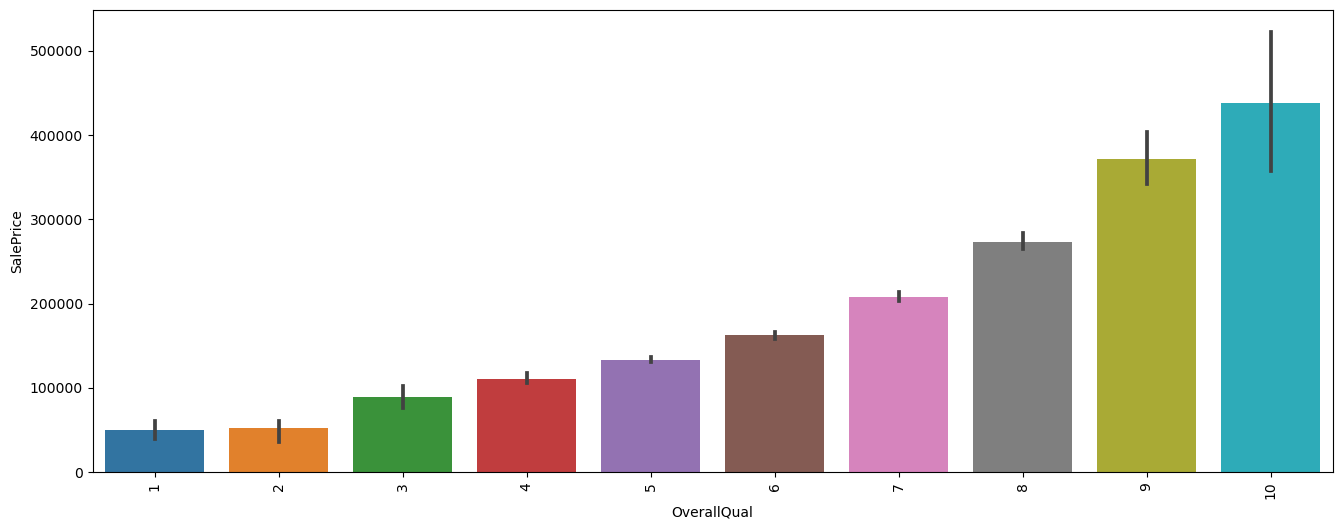

In [59]:
plt.figure(figsize=(16,6))
sns.barplot(x="OverallQual",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

Very Excellent class value has the higher quality and hence the price increases and the graph shows the slope as the quality increases the Sales Price increases.

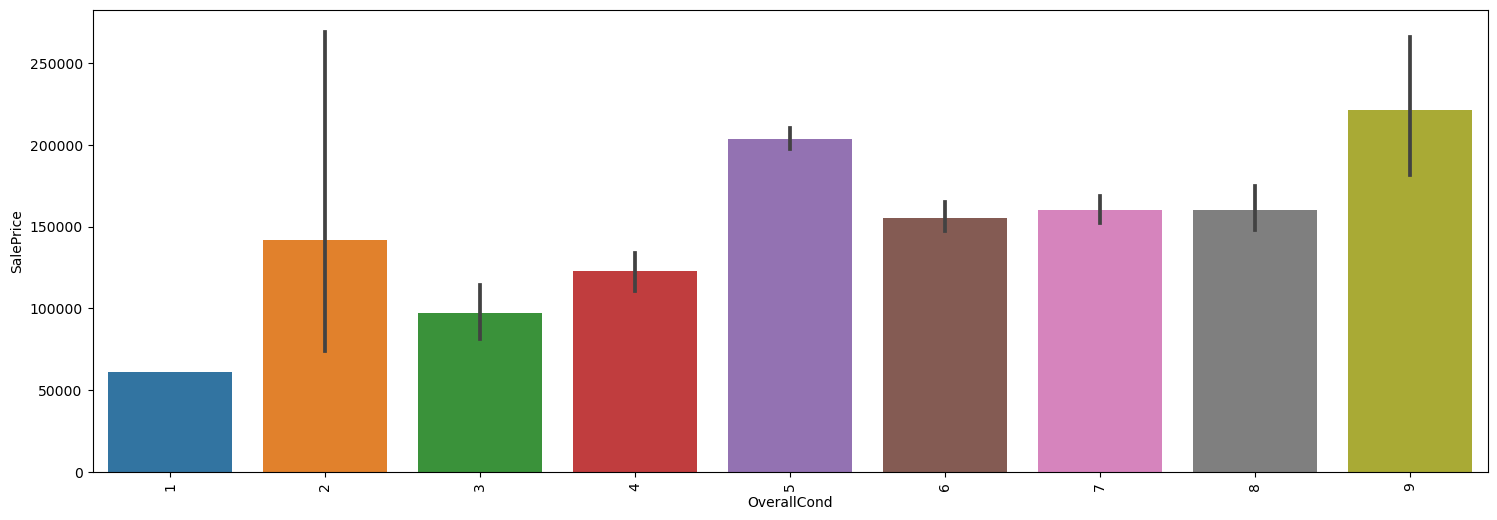

In [60]:
plt.figure(figsize=(18,6))
sns.barplot(x="OverallCond",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

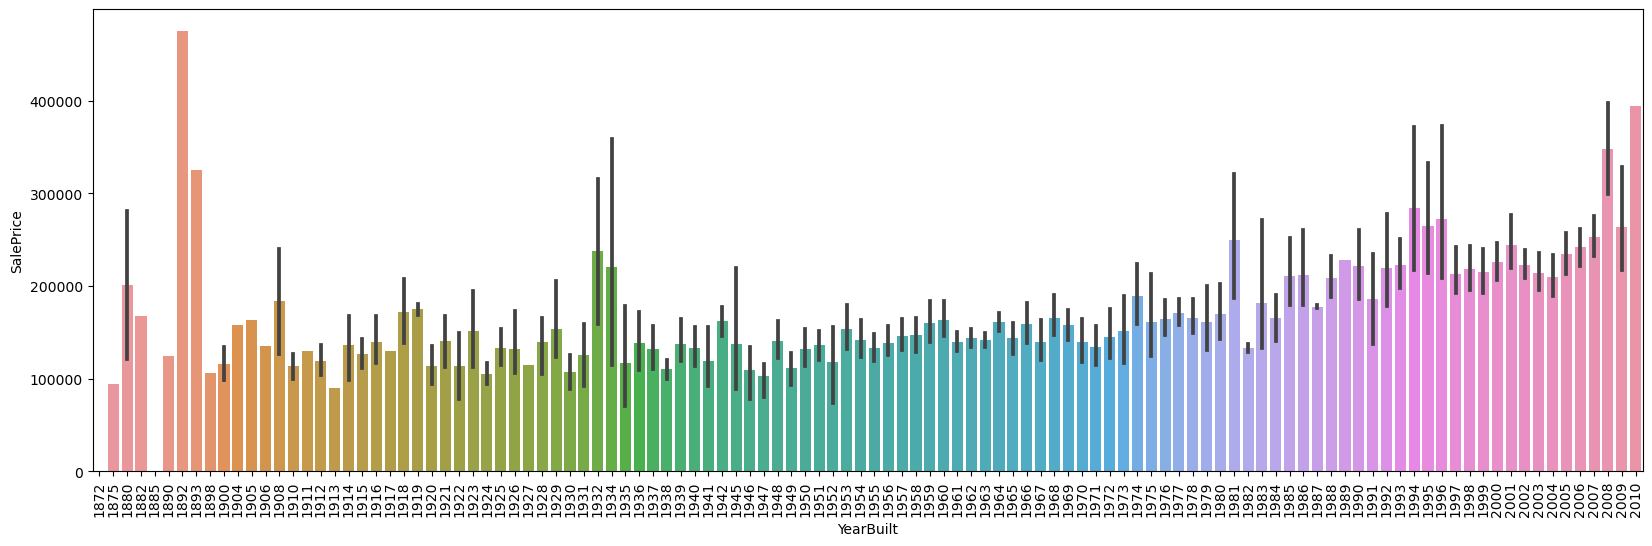

In [61]:
plt.figure(figsize=(20,6))
sns.barplot(x="YearBuilt",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

Year 2010 and year 1892 has the max price in sales.

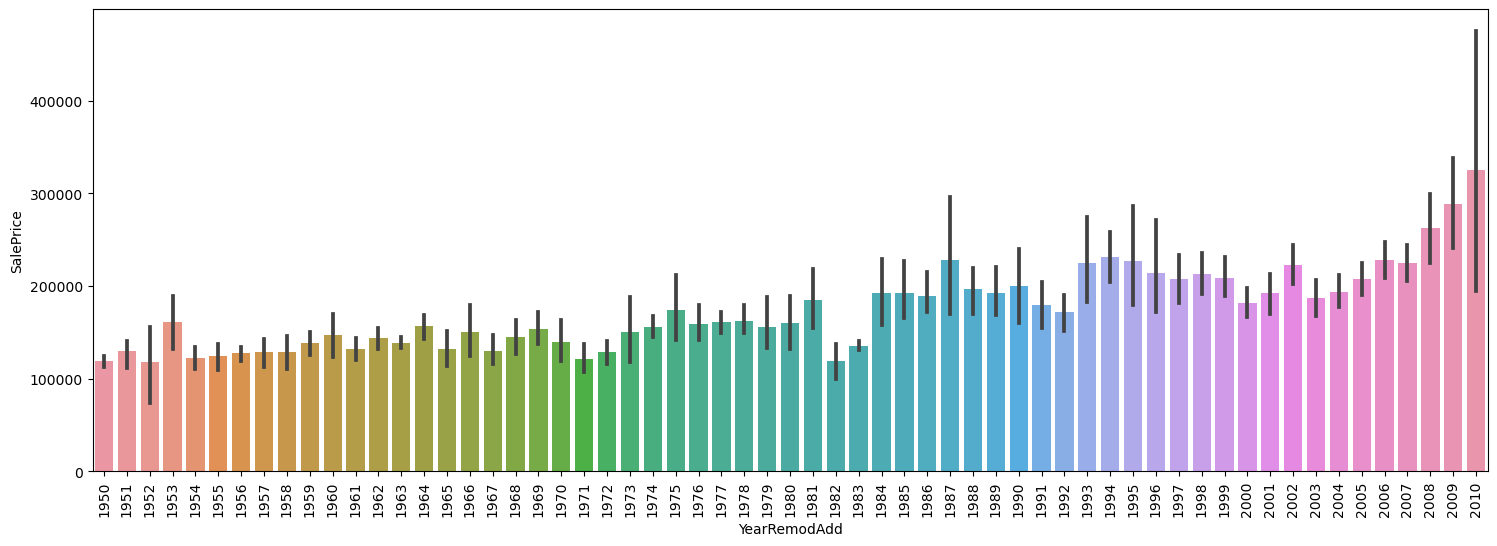

In [62]:
plt.figure(figsize=(18,6))
sns.barplot(x="YearRemodAdd",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

Remodeling done in year 2010 is max.

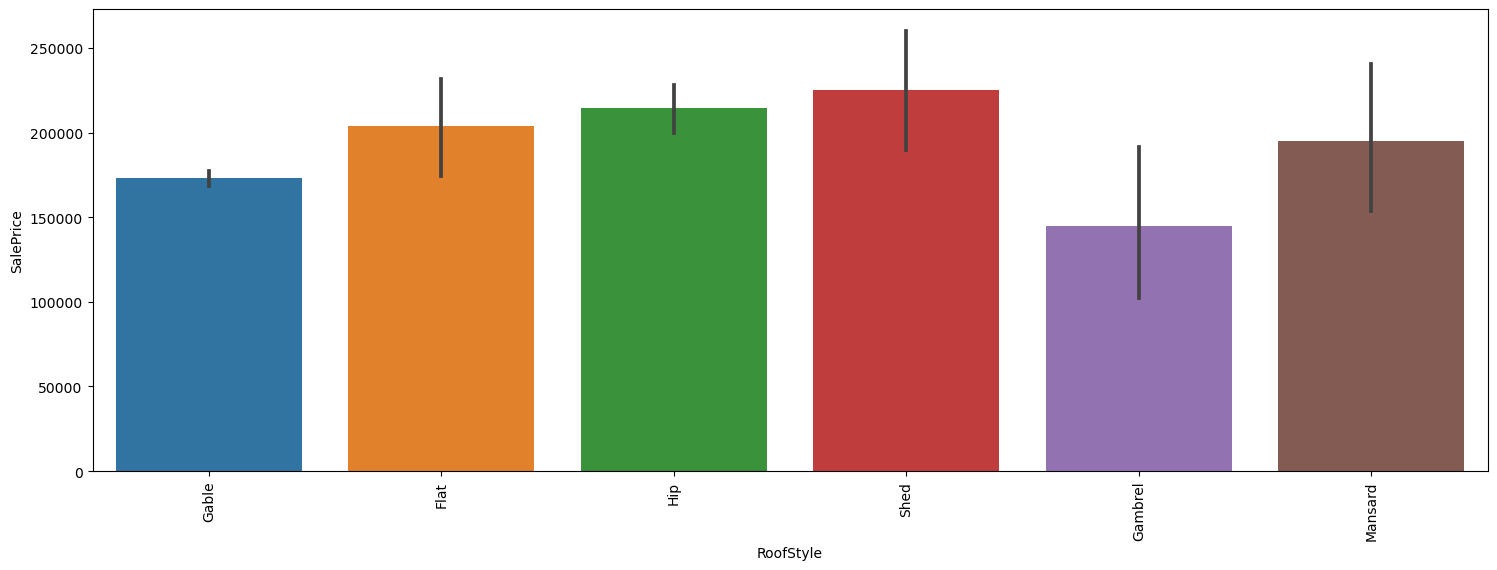

In [63]:
plt.figure(figsize=(18,6))
sns.barplot(x="RoofStyle",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

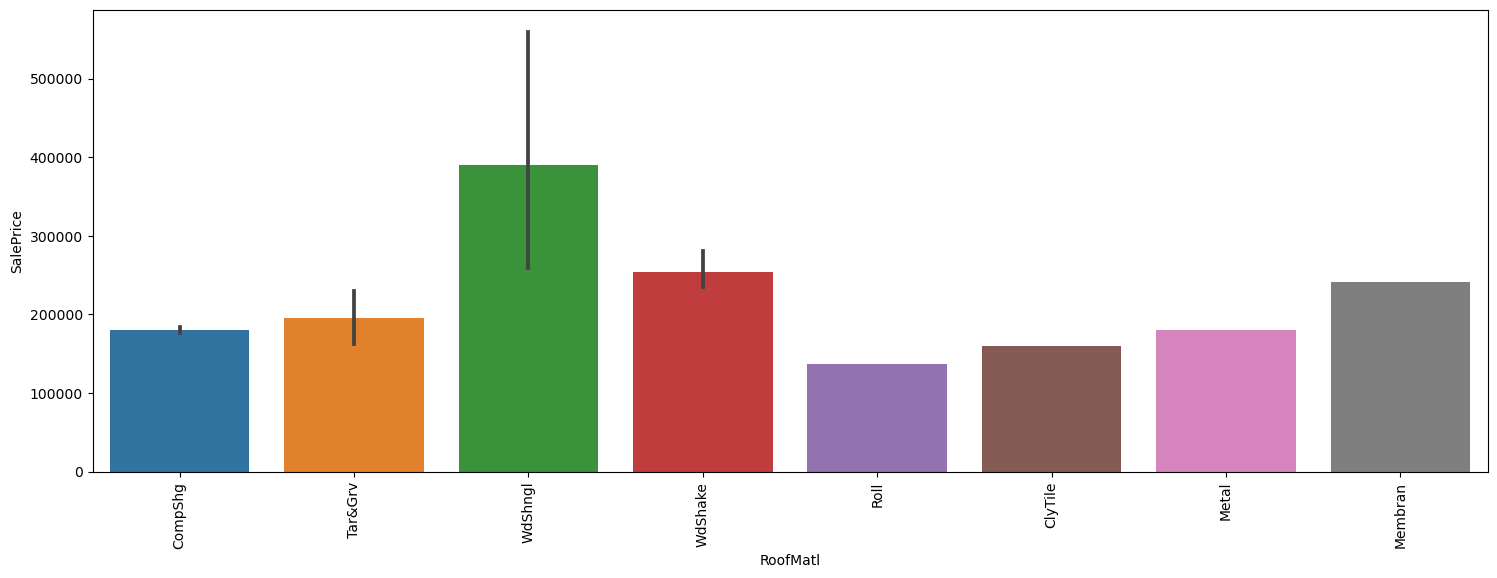

In [64]:
plt.figure(figsize=(18,6))
sns.barplot(x="RoofMatl",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

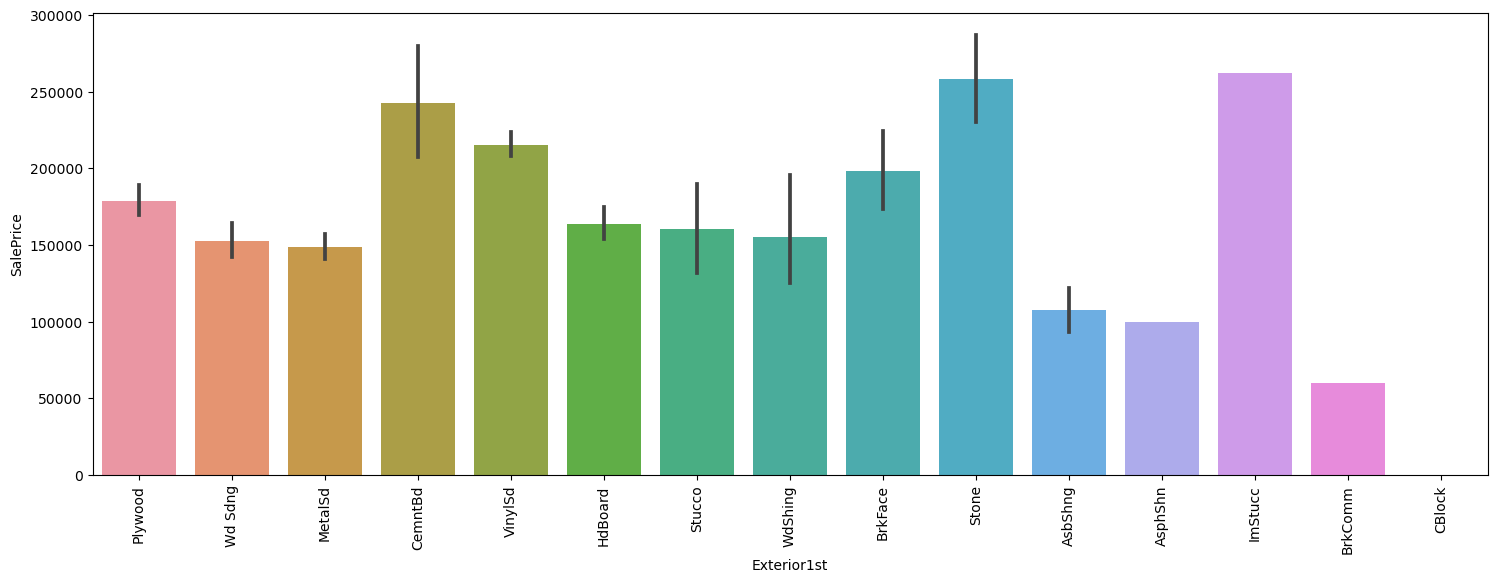

In [65]:
plt.figure(figsize=(18,6))
sns.barplot(x="Exterior1st",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

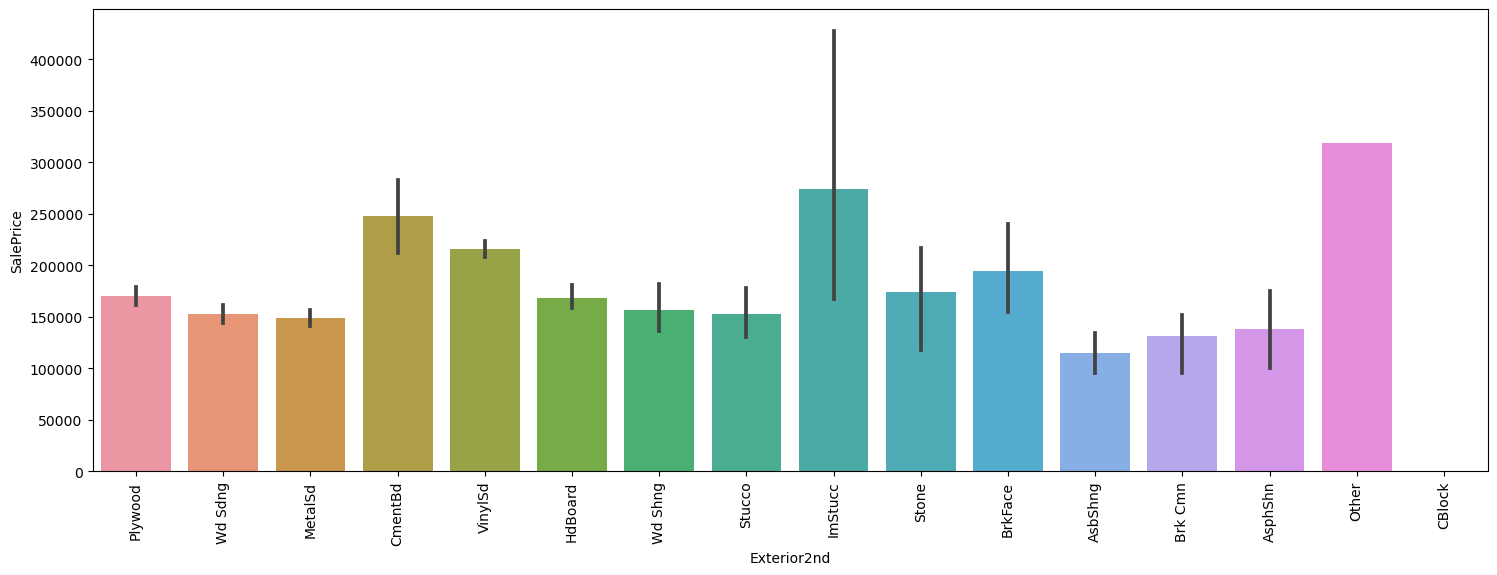

In [66]:
plt.figure(figsize=(18,6))
sns.barplot(x="Exterior2nd",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

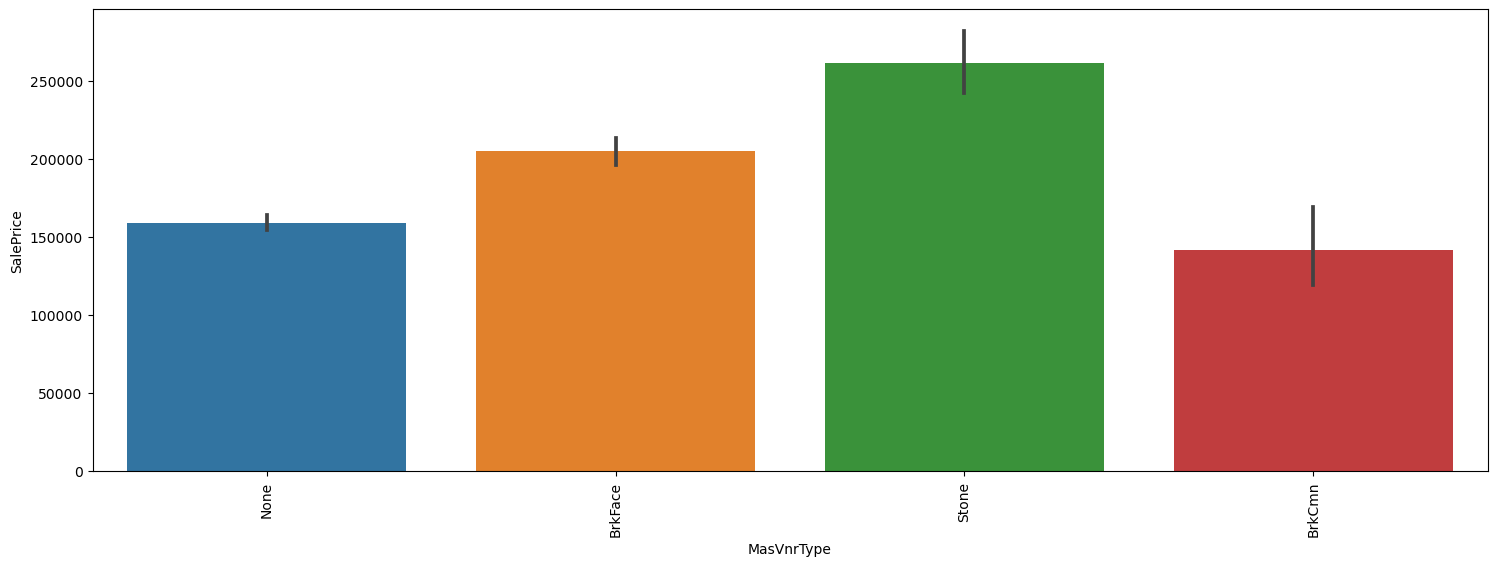

In [67]:
plt.figure(figsize=(18,6))
sns.barplot(x="MasVnrType",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

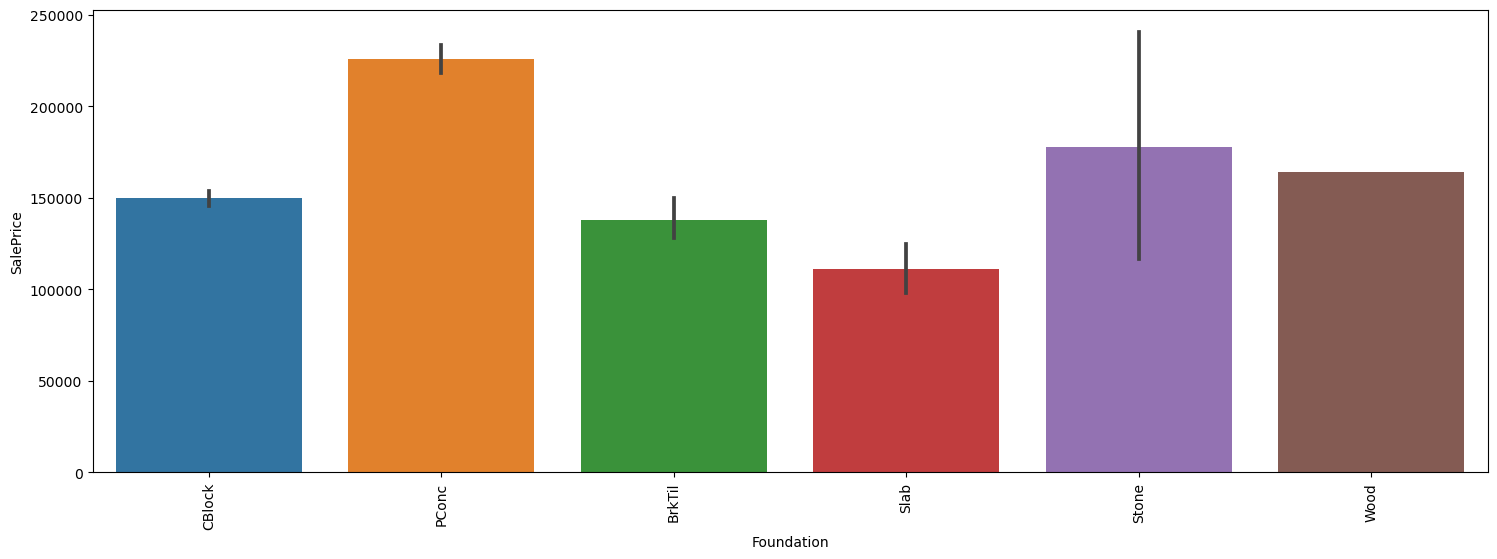

In [68]:
plt.figure(figsize=(18,6))
sns.barplot(x="Foundation",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

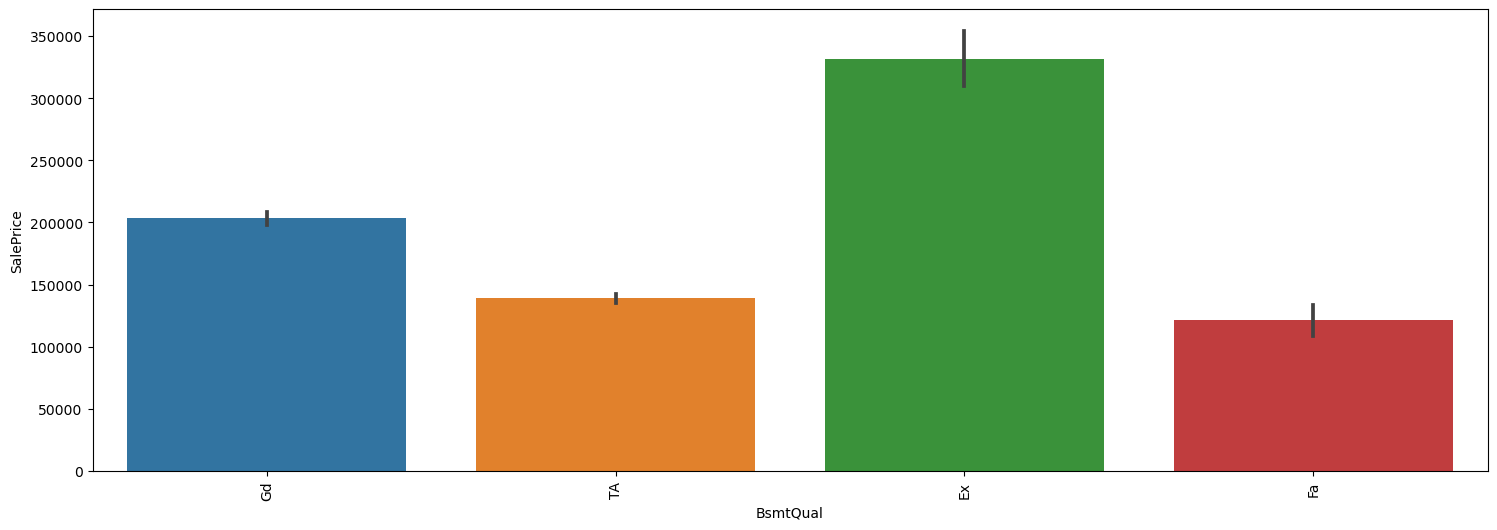

In [69]:
plt.figure(figsize=(18,6))
sns.barplot(x="BsmtQual",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

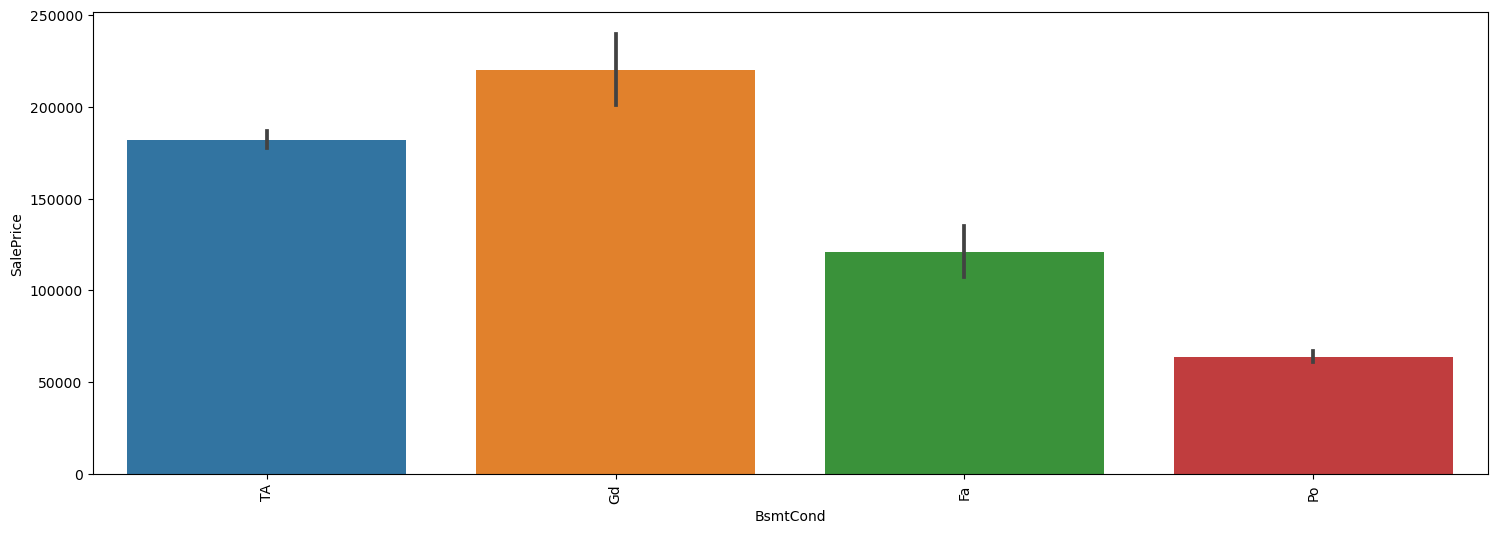

In [70]:
plt.figure(figsize=(18,6))
sns.barplot(x="BsmtCond",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

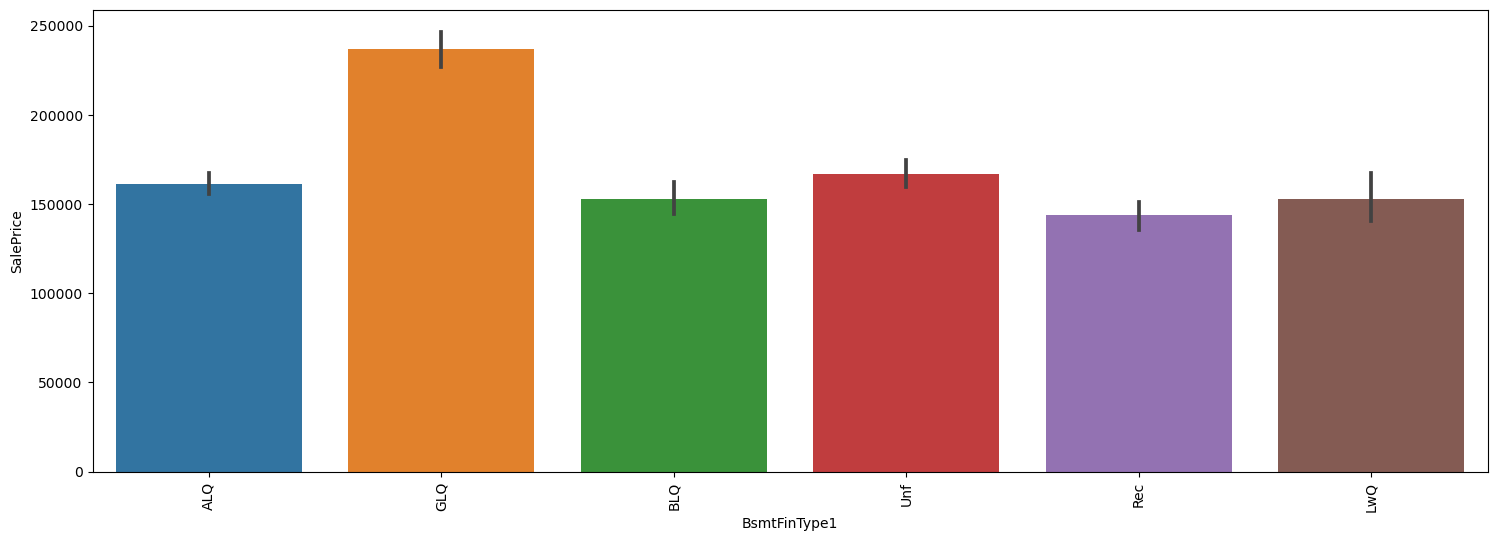

In [71]:
plt.figure(figsize=(18,6))
sns.barplot(x="BsmtFinType1",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

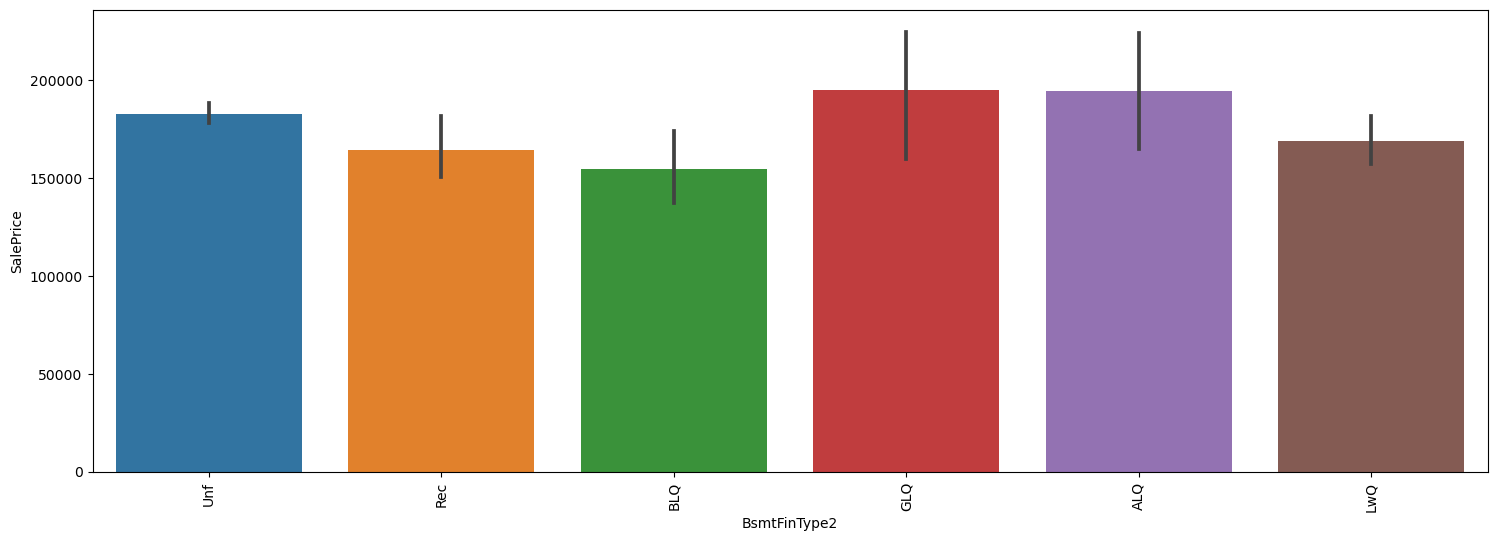

In [72]:
plt.figure(figsize=(18,6))
sns.barplot(x="BsmtFinType2",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

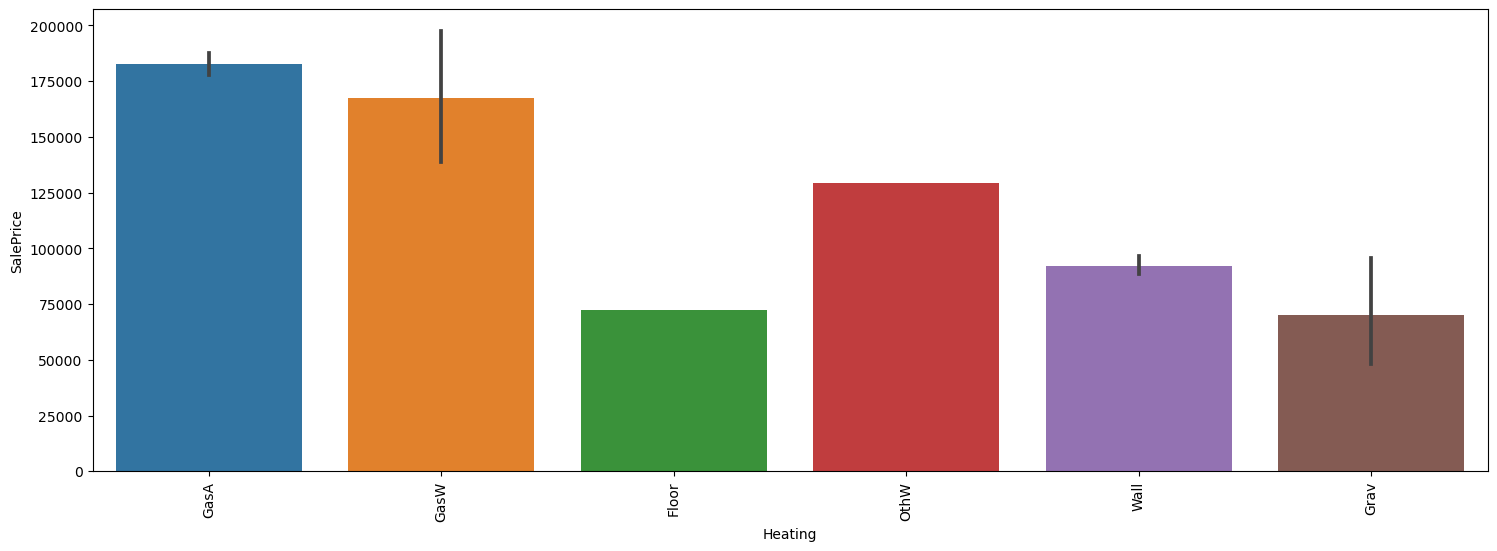

In [73]:
plt.figure(figsize=(18,6))
sns.barplot(x="Heating",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

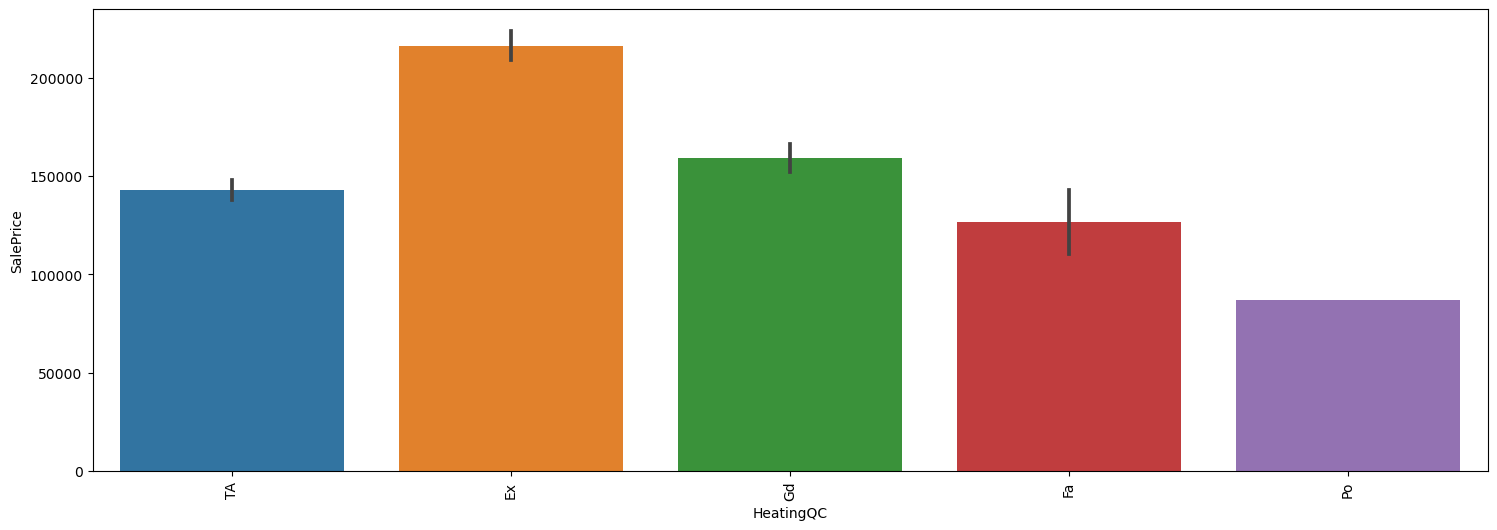

In [74]:
plt.figure(figsize=(18,6))
sns.barplot(x="HeatingQC",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

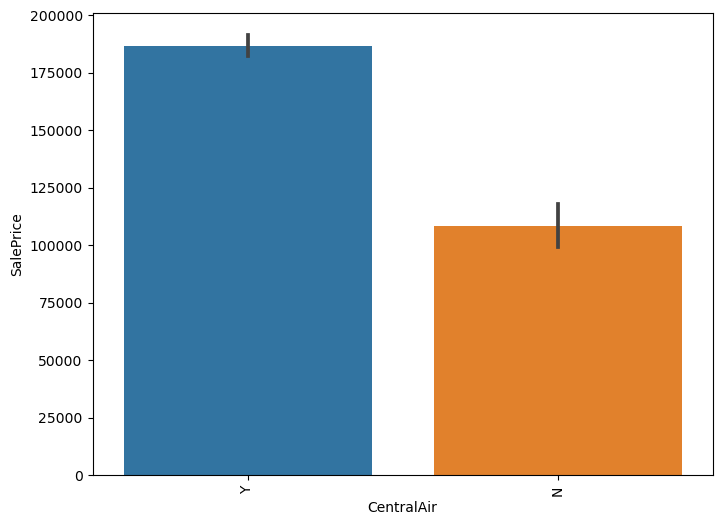

In [75]:
plt.figure(figsize=(8,6))
sns.barplot(x="CentralAir",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

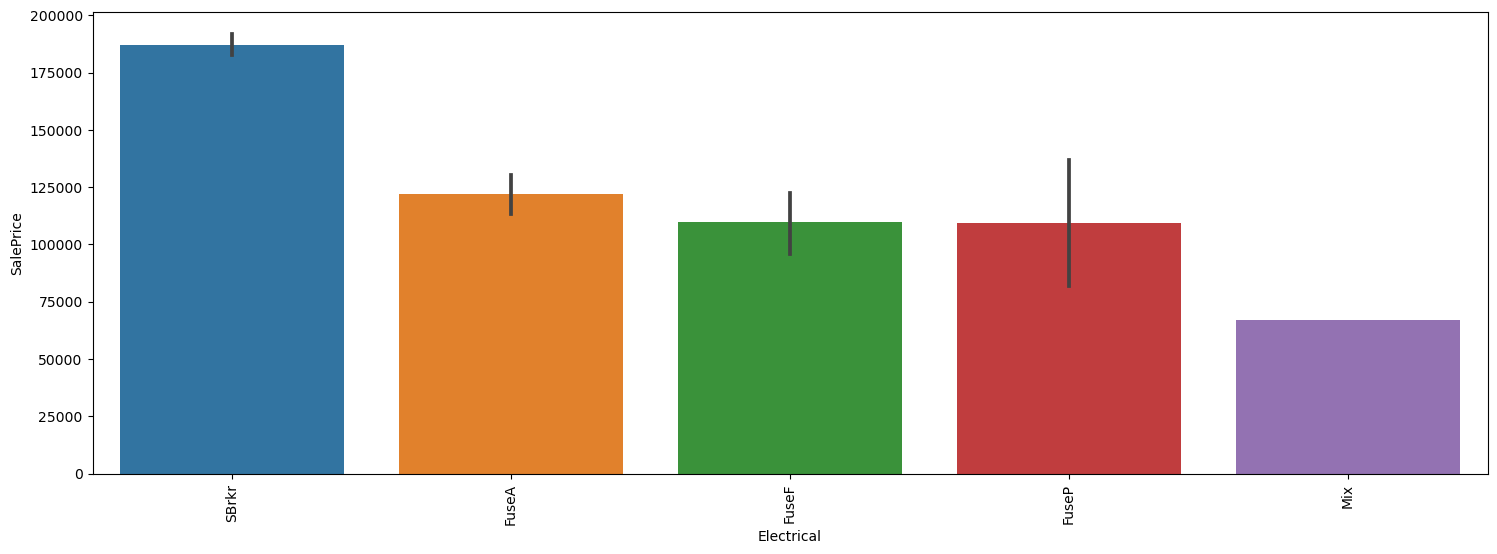

In [76]:
plt.figure(figsize=(18,6))
sns.barplot(x="Electrical",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

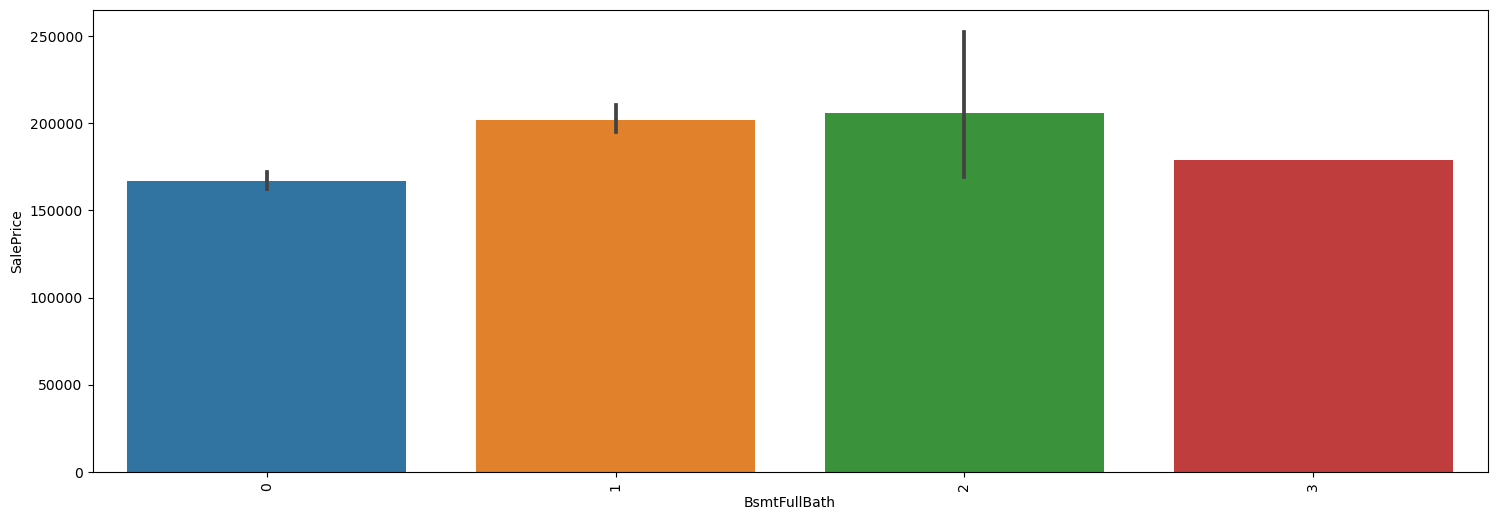

In [77]:
plt.figure(figsize=(18,6))
sns.barplot(x="BsmtFullBath",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

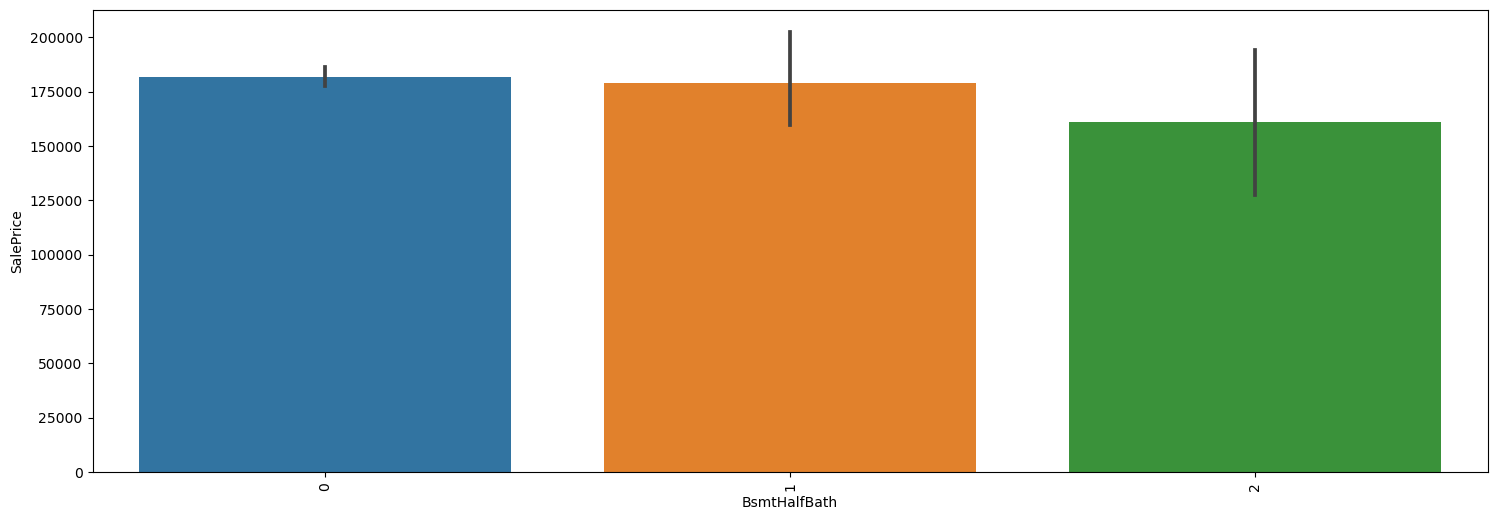

In [78]:
plt.figure(figsize=(18,6))
sns.barplot(x="BsmtHalfBath",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

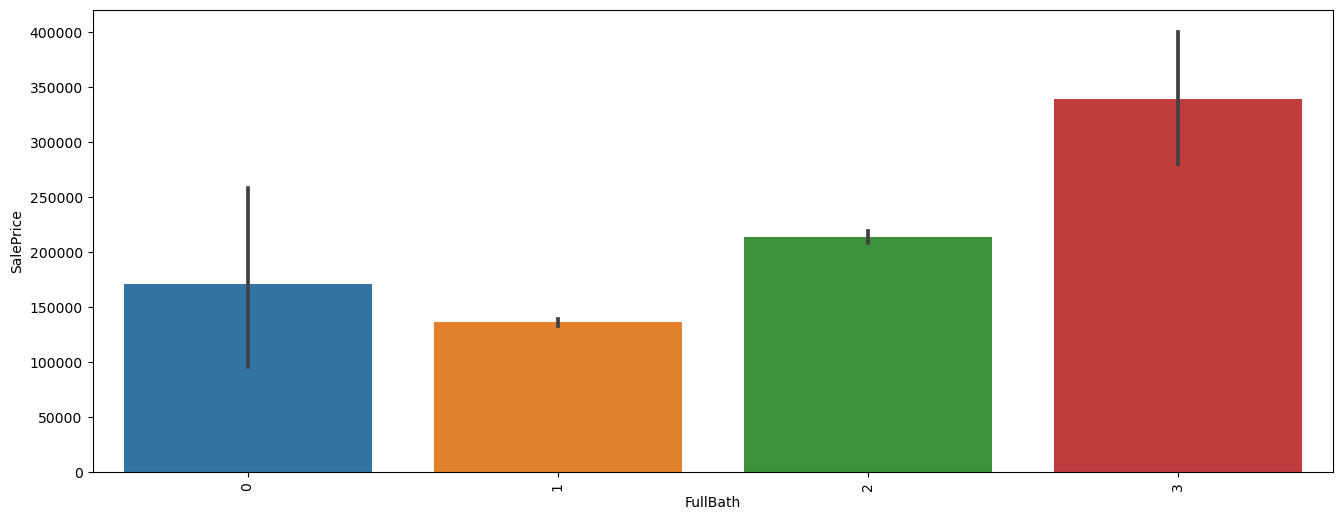

In [79]:
plt.figure(figsize=(16,6))
sns.barplot(x="FullBath",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

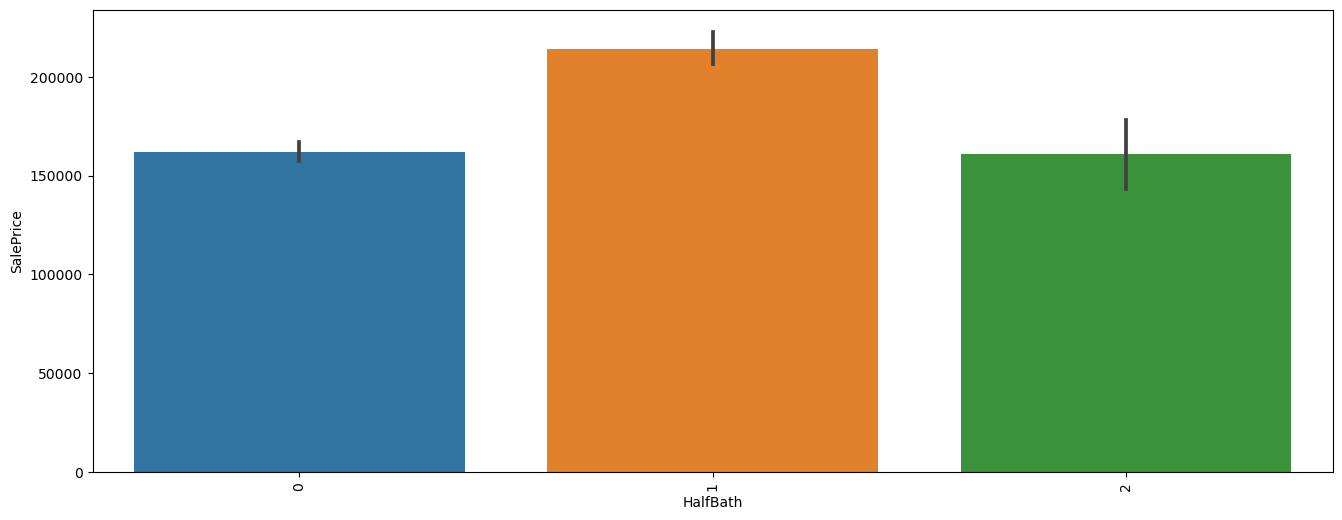

In [80]:
plt.figure(figsize=(16,6))
sns.barplot(x="HalfBath",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

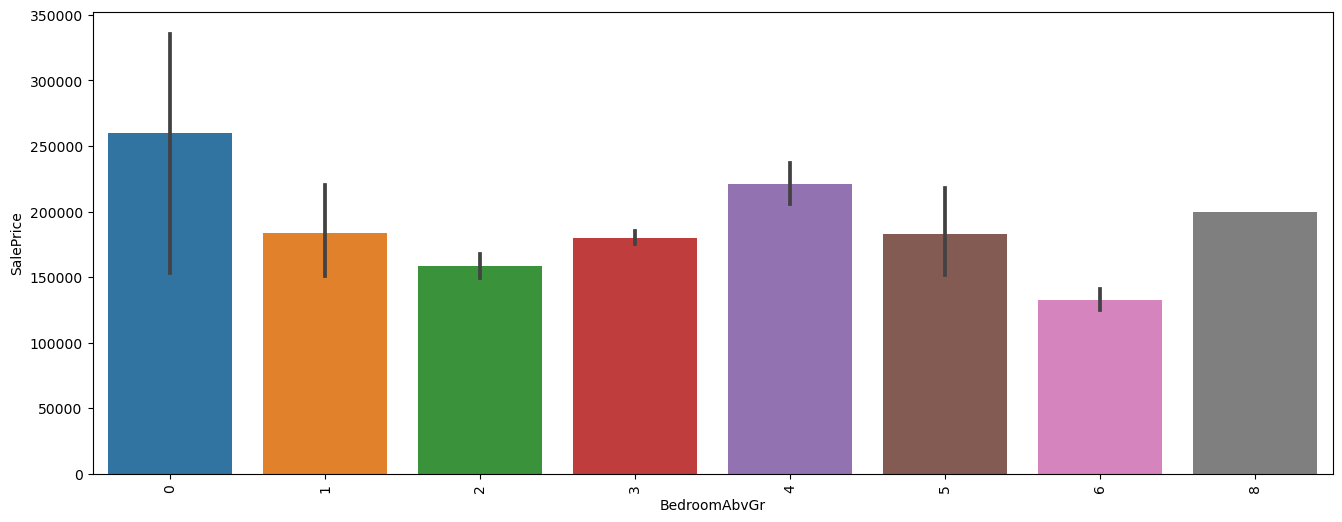

In [81]:
plt.figure(figsize=(16,6))
sns.barplot(x="BedroomAbvGr",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

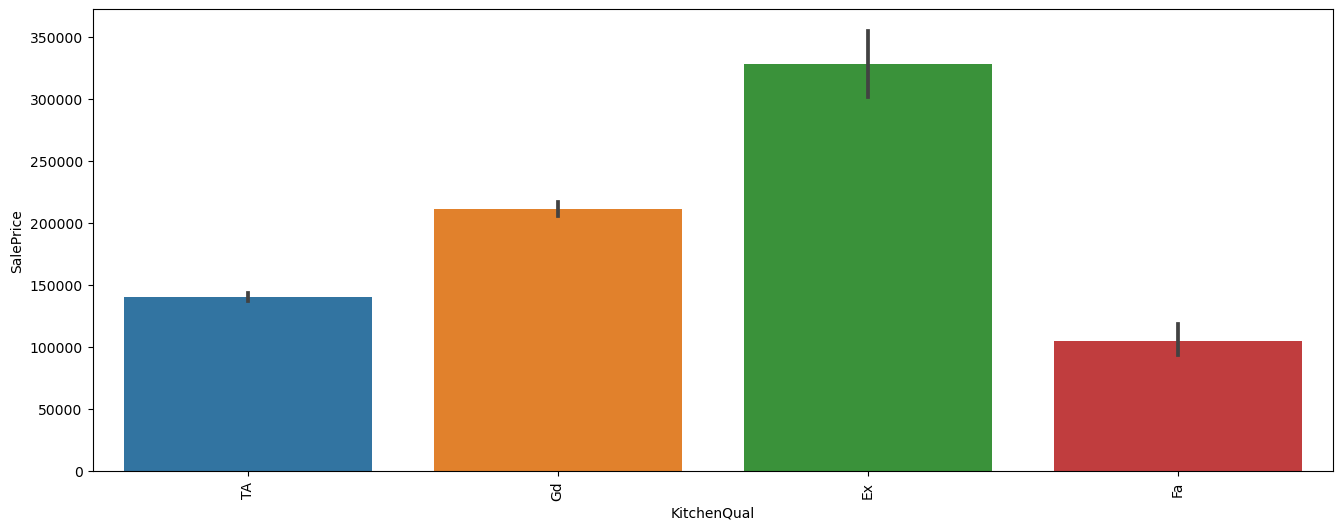

In [82]:
plt.figure(figsize=(16,6))
sns.barplot(x="KitchenQual",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

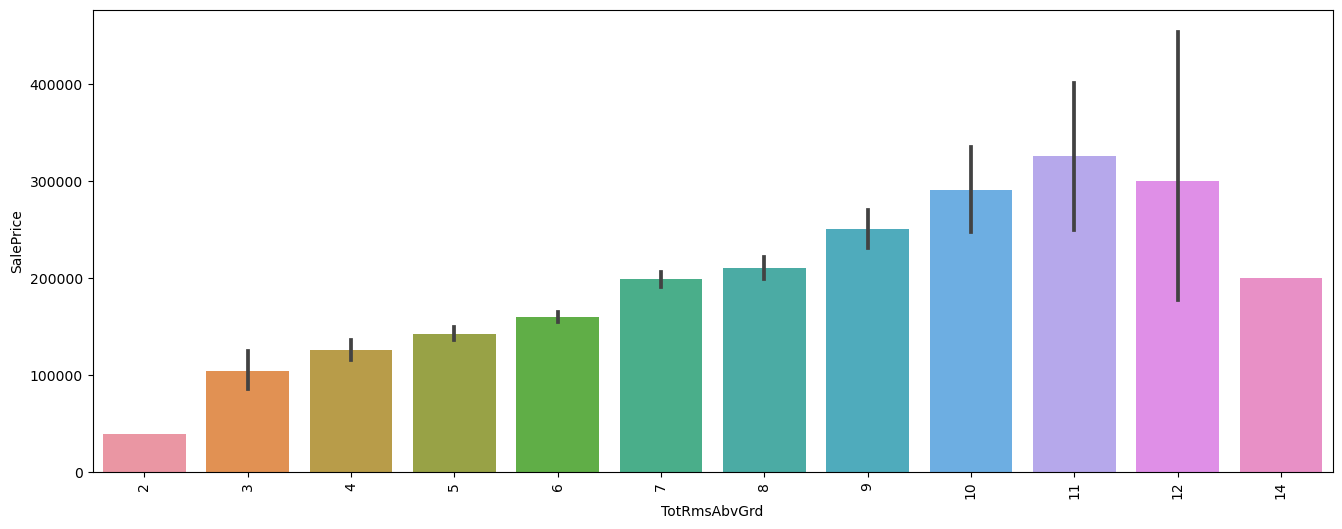

In [83]:
plt.figure(figsize=(16,6))
sns.barplot(x="TotRmsAbvGrd",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

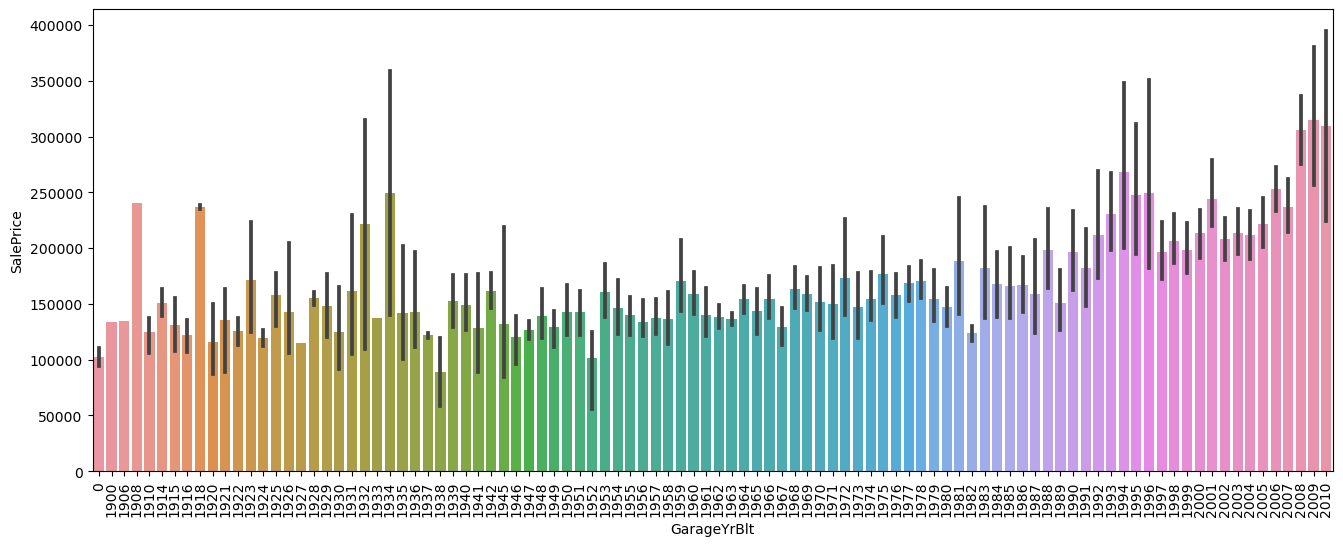

In [84]:
plt.figure(figsize=(16,6))
sns.barplot(x="GarageYrBlt",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

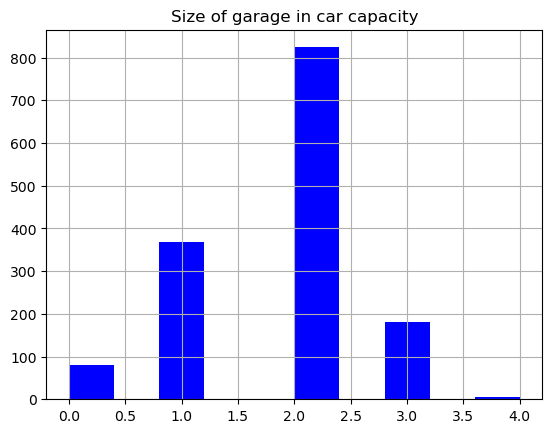

In [85]:
df_concat["GarageCars"].hist(grid=True,color='blue')
plt.title("Size of garage in car capacity")
plt.show()

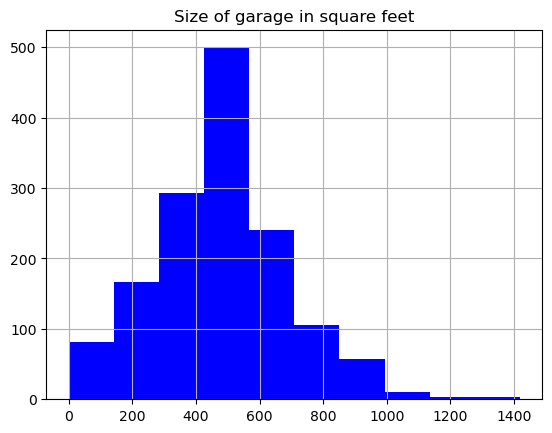

In [86]:
df_concat["GarageArea"].hist(grid=True,color='blue')
plt.title("Size of garage in square feet")
plt.show()

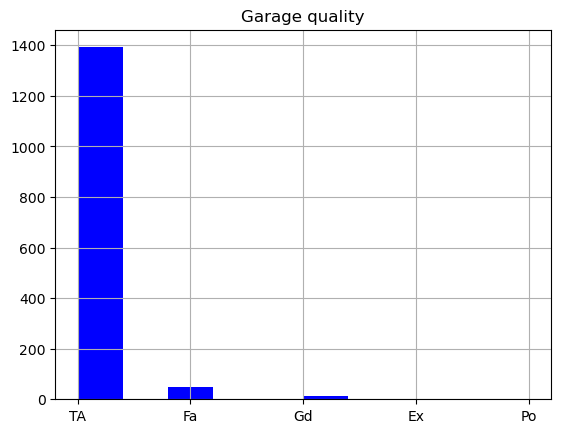

In [87]:
df_concat["GarageQual"].hist(grid=True,color='blue')
plt.title("Garage quality")
plt.show()

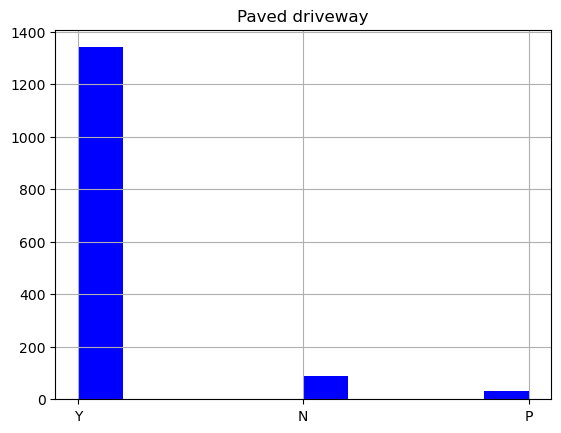

In [88]:
df_concat["PavedDrive"].hist(grid=True,color='blue')
plt.title("Paved driveway")
plt.show()

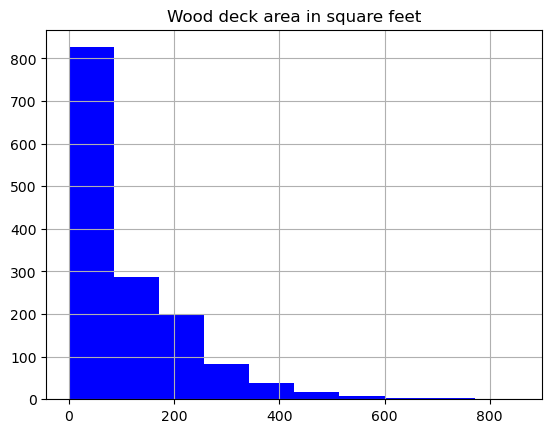

In [89]:
df_concat["WoodDeckSF"].hist(grid=True,color='blue')
plt.title("Wood deck area in square feet")
plt.show()

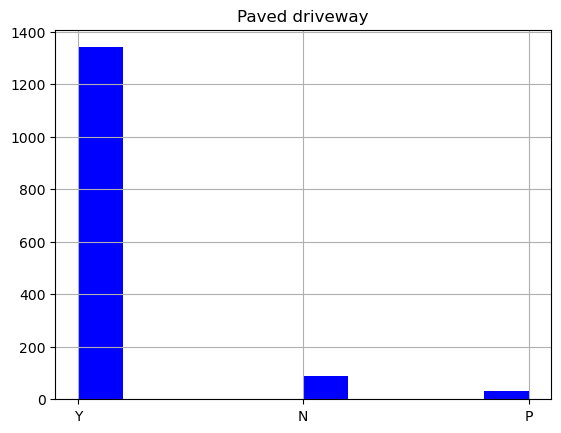

In [90]:
df_concat["PavedDrive"].hist(grid=True,color='blue')
plt.title("Paved driveway")
plt.show()

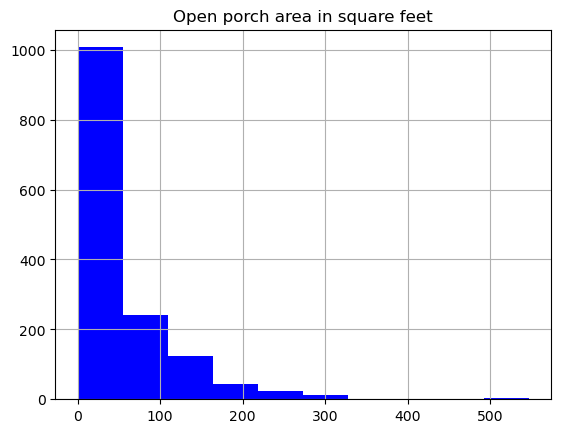

In [91]:
df_concat["OpenPorchSF"].hist(grid=True,color='blue')
plt.title("Open porch area in square feet")
plt.show()

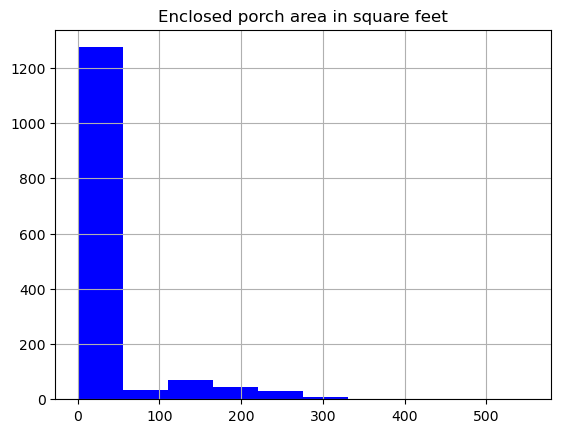

In [92]:
df_concat["EnclosedPorch"].hist(grid=True,color='blue')
plt.title("Enclosed porch area in square feet")
plt.show()

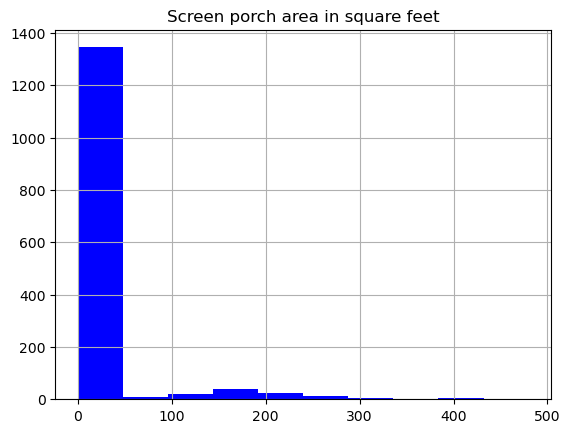

In [93]:
df_concat["ScreenPorch"].hist(grid=True,color='blue')
plt.title("Screen porch area in square feet")
plt.show()

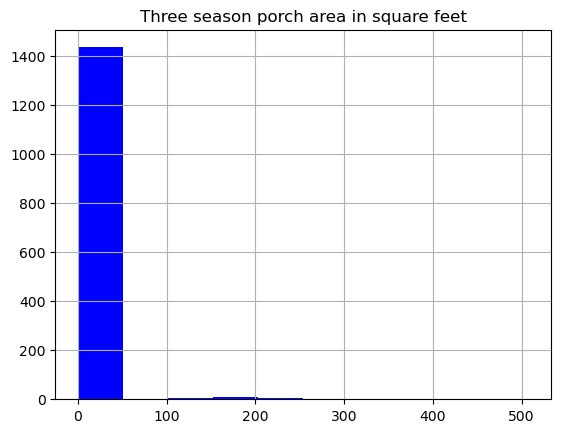

In [94]:
df_concat["3SsnPorch"].hist(grid=True,color='blue')
plt.title("Three season porch area in square feet")
plt.show()

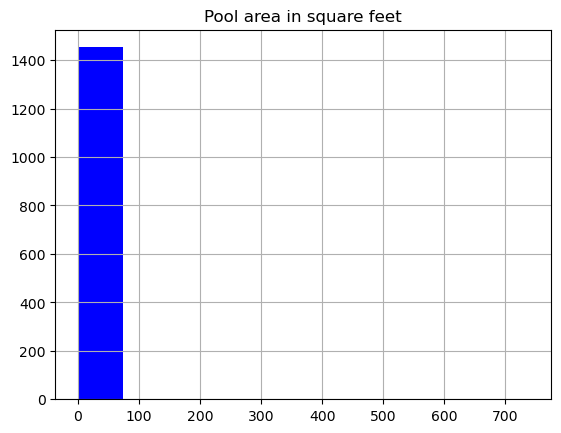

In [95]:
df_concat["PoolArea"].hist(grid=True,color='blue')
plt.title("Pool area in square feet")
plt.show()

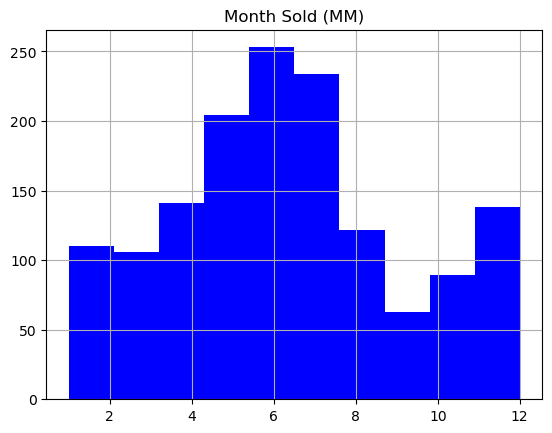

In [96]:
df_concat["MoSold"].hist(grid=True,color='blue')
plt.title("Month Sold (MM)")
plt.show()

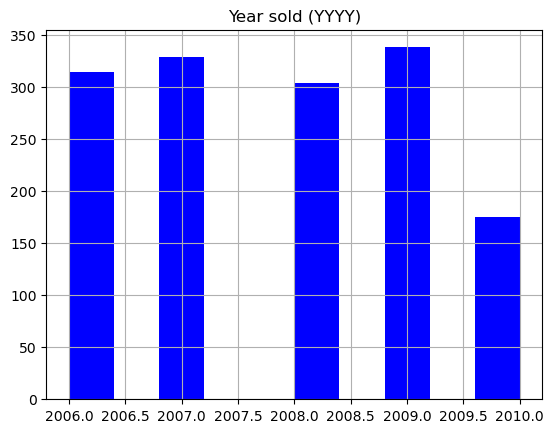

In [97]:
df_concat["YrSold"].hist(grid=True,color='blue')
plt.title("Year sold (YYYY)")
plt.show()

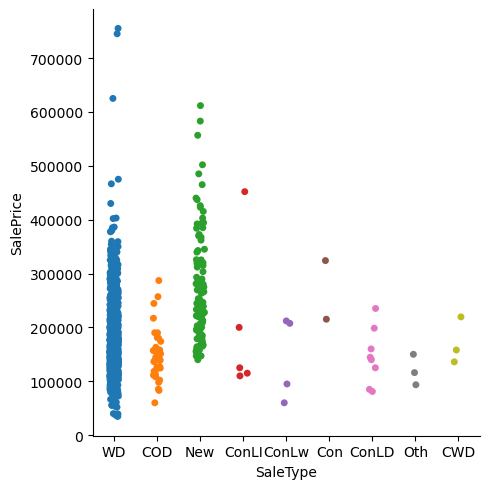

In [98]:
sns.catplot(x='SaleType',y='SalePrice',data=df_concat)

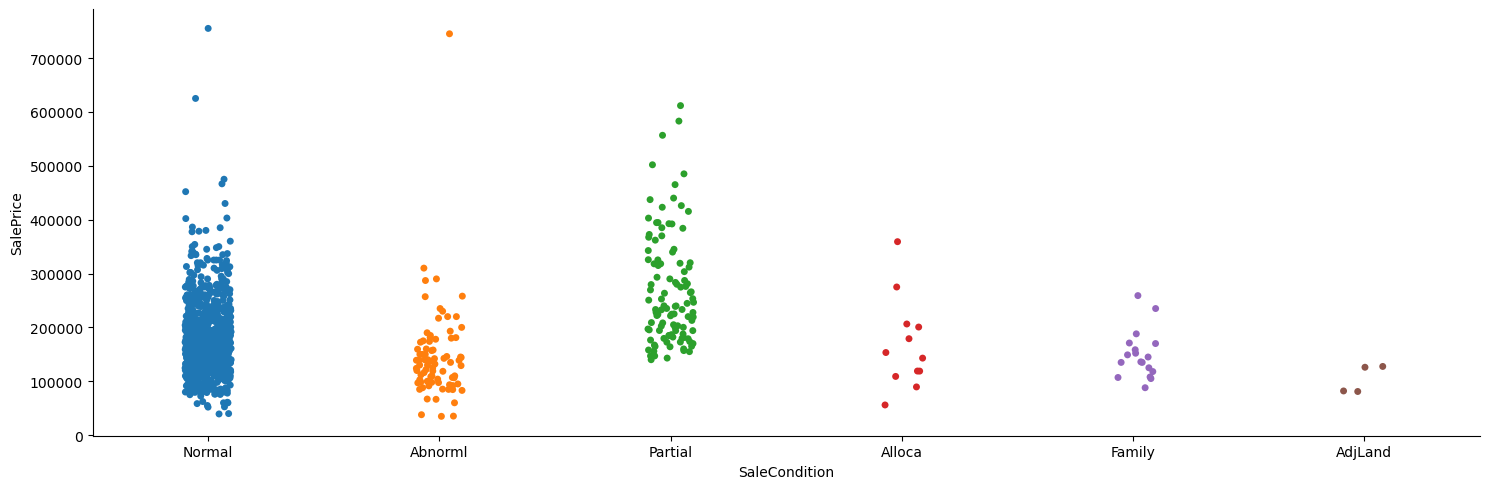

In [99]:
sns.catplot(x='SaleCondition',y='SalePrice',data=df_concat.sort_values("SalePrice",ascending=False),height=5,aspect=3)

(array([0, 1, 2]), [Text(0, 0, 'RFn'), Text(1, 0, 'Unf'), Text(2, 0, 'Fin')])

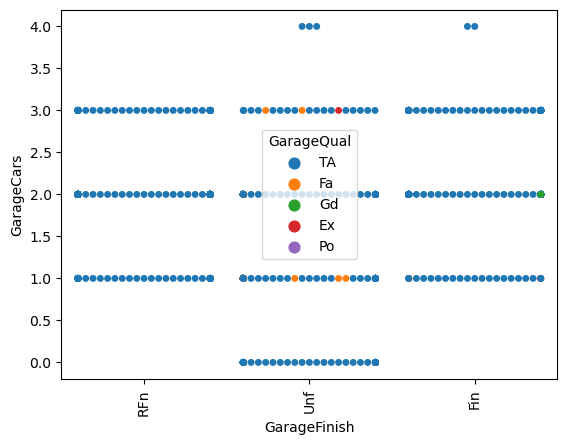

In [100]:
sns.swarmplot(x="GarageFinish",y="GarageCars",hue='GarageQual',data=df_concat)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='YrSold', ylabel='YearBuilt'>

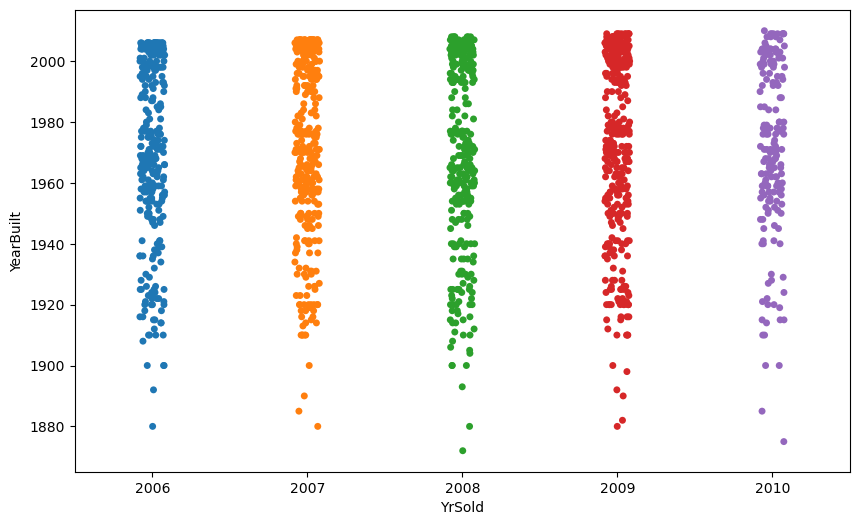

In [101]:
plt.figure(figsize=(10,6))
sns.stripplot(x="YrSold", y="YearBuilt", data=df_concat, jitter=.08)

<AxesSubplot:xlabel='HouseStyle', ylabel='OverallQual'>

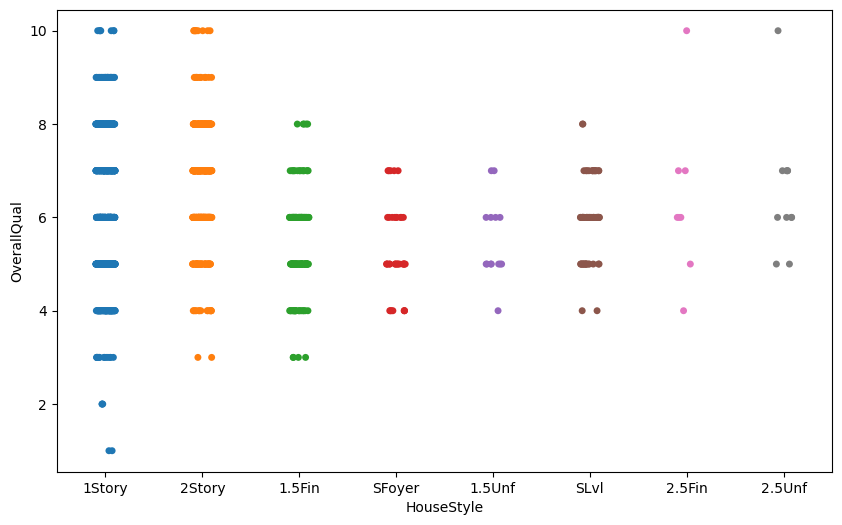

In [102]:
plt.figure(figsize=(10,6))
sns.stripplot(x="HouseStyle", y="OverallQual", data=df_concat, jitter=.1)

In [103]:
corr_mat=df_concat.corr()
corr_mat

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.060775
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.323828
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.249499
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.789185
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.065642
YearBuilt,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.514408
YearRemodAdd,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507831
MasVnrArea,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.460535
BsmtFinSF1,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.362874
BsmtFinSF2,-0.065649,0.042463,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.010151


# PLOTTING THE HEATMAP

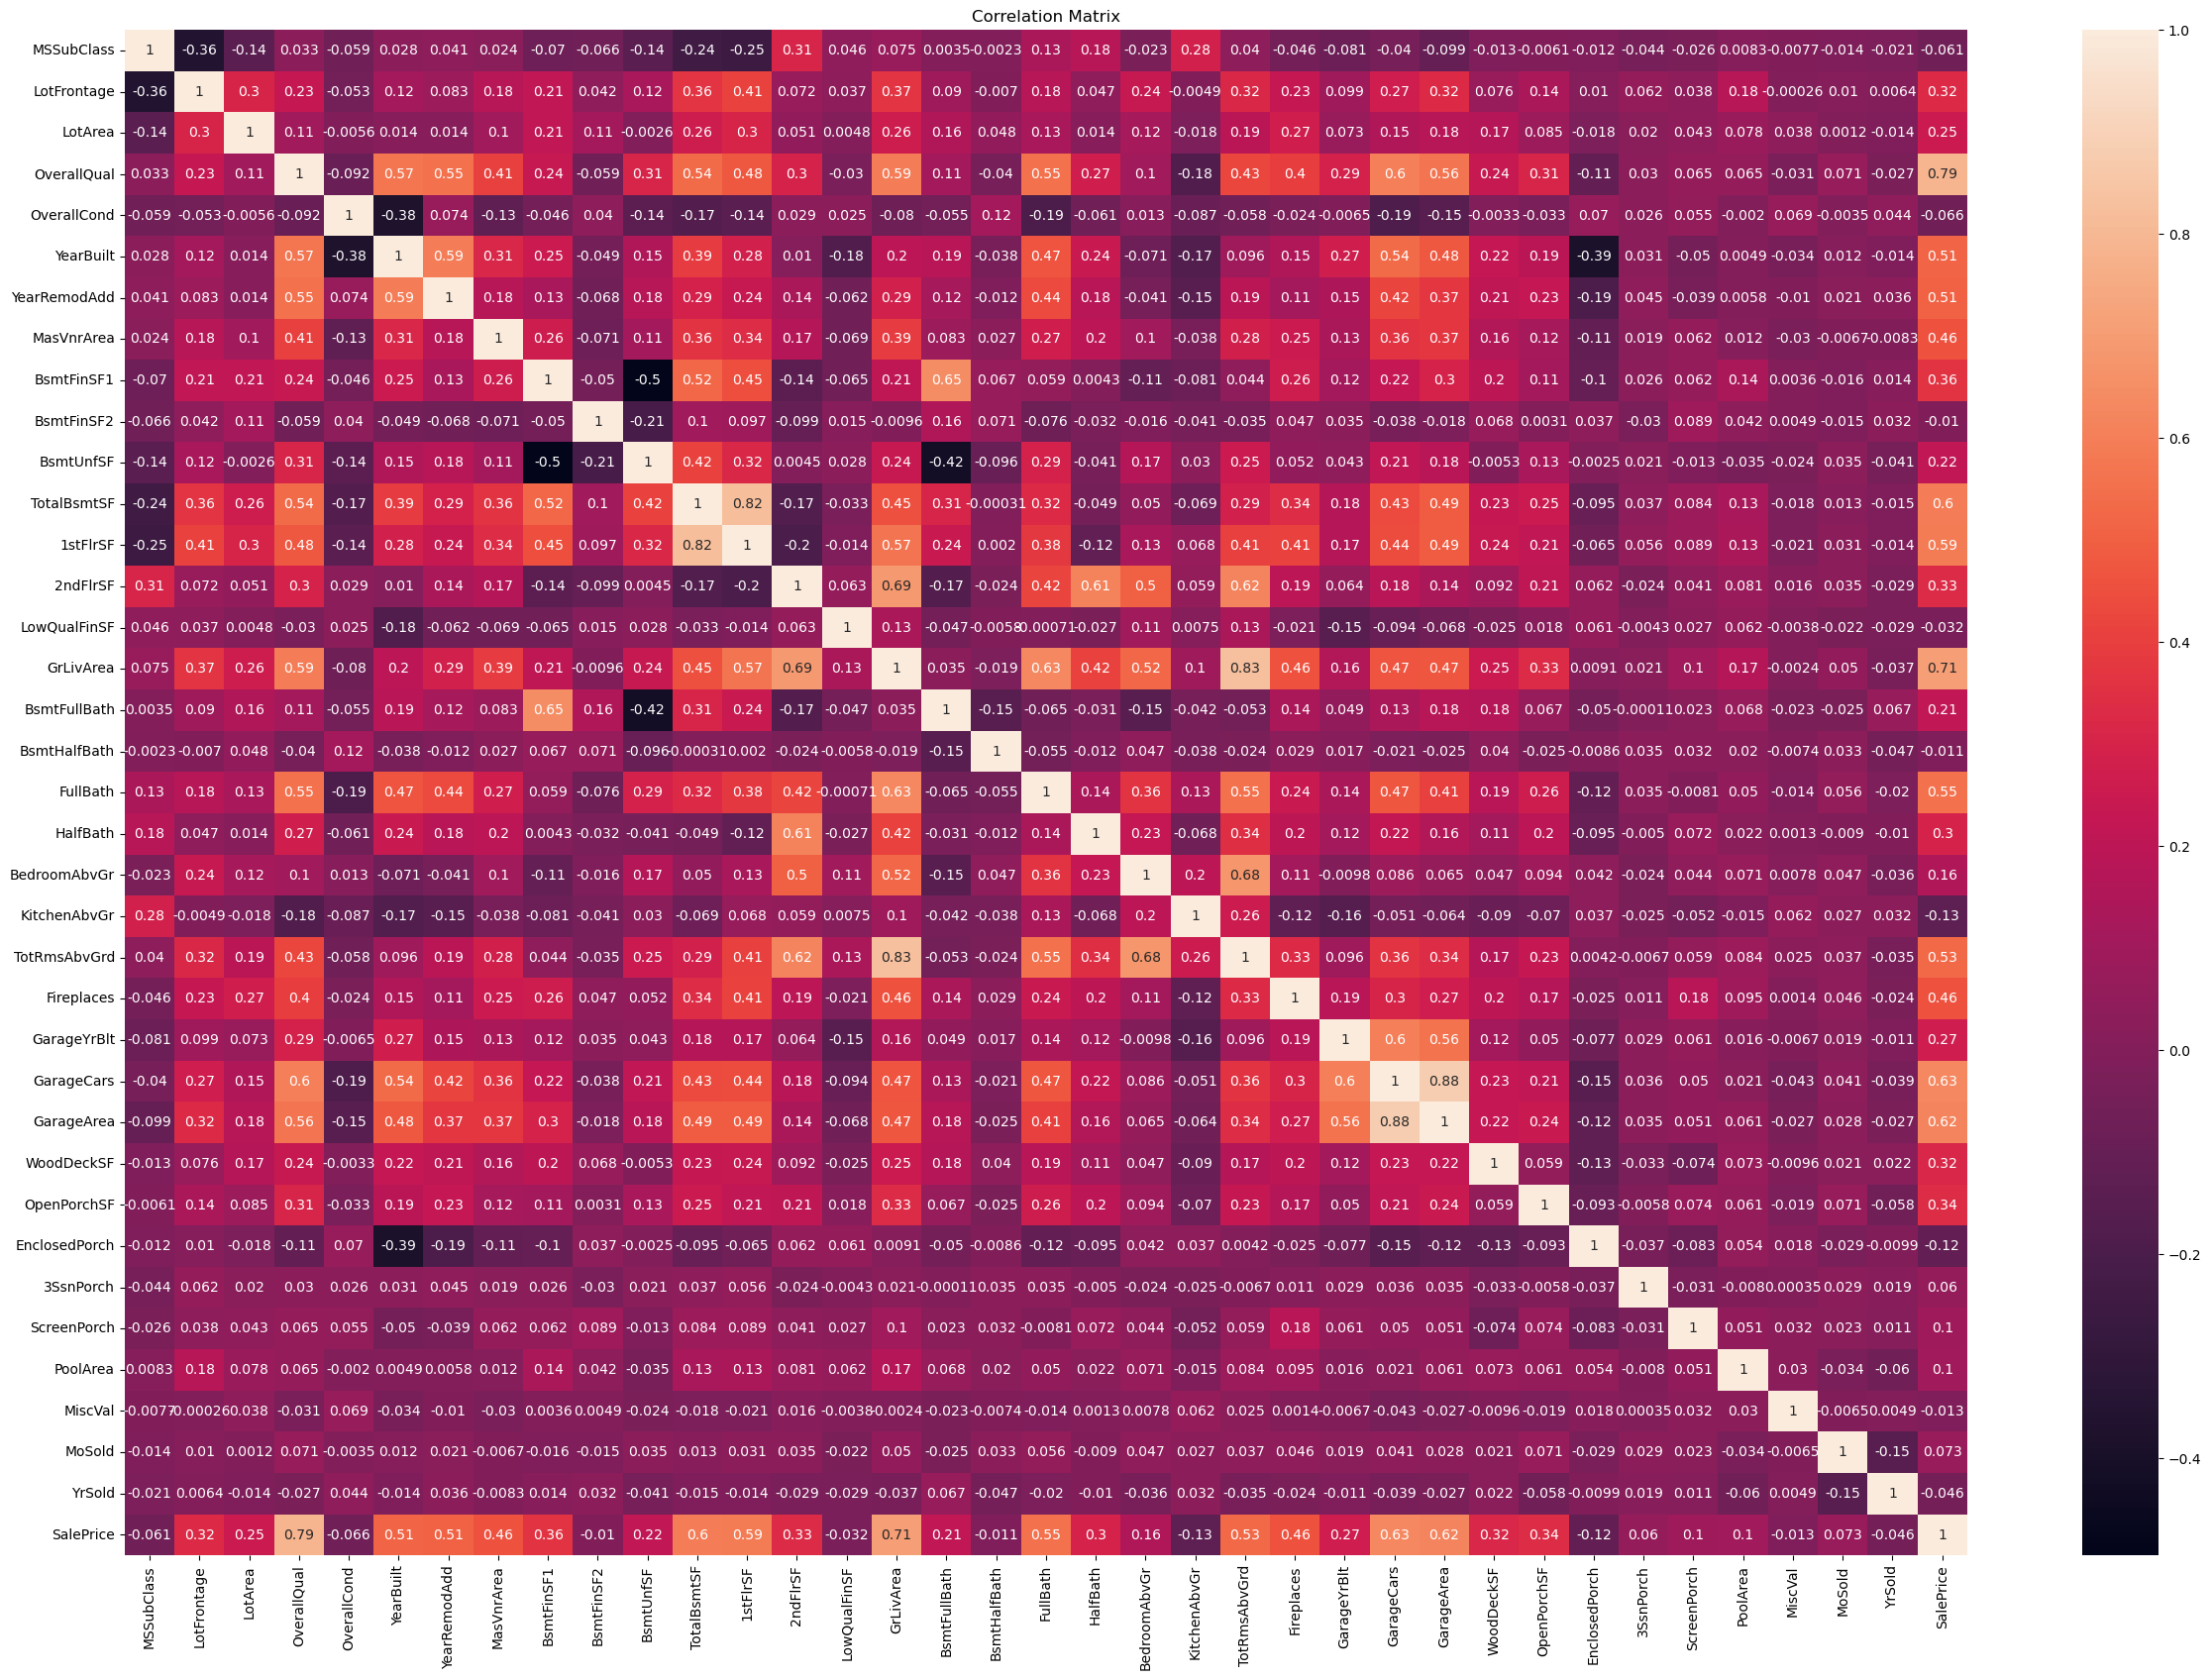

In [104]:
plt.figure(figsize=[30,20])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

We can notice that KitchenAbvGr is some what negatively correlated with SalePrice column when compared with other columns. Most of the columns are positively correlated with salesprice columns like: OverallQual,YearBlt,YearRemodelAdd,FullBath,GarageCars .

In [105]:
df_concat.select_dtypes(include=['int64','float'])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,120,69.0,4928,6,5,1976,1976,0.0,120,0,...,0,205,0,0,0,0,0,2,2007,128000.0
1,20,95.0,15865,8,6,1970,1970,0.0,351,823,...,81,207,0,0,224,0,0,10,2007,268000.0
2,60,92.0,9920,7,5,1996,1997,0.0,862,0,...,180,130,0,0,0,0,0,6,2007,269790.0
3,20,105.0,11751,6,6,1977,1977,480.0,705,0,...,0,122,0,0,0,0,0,1,2010,190000.0
4,20,69.0,16635,6,7,1977,2000,126.0,1246,0,...,240,0,0,0,0,0,0,6,2009,215000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,20,78.0,10206,8,5,2007,2007,468.0,33,0,...,144,99,0,0,0,0,0,10,2008,NaN
1456,20,57.0,9245,5,5,1994,1995,0.0,686,0,...,0,0,0,0,0,0,0,2,2008,NaN
1457,20,69.0,11241,6,7,1970,1970,180.0,578,0,...,0,0,0,0,0,0,700,3,2010,NaN
1458,50,50.0,5000,6,7,1947,1950,0.0,399,0,...,0,24,36,0,0,0,0,10,2006,NaN


In [106]:
df_concat.select_dtypes(include=['object'])

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,dataset_type
0,RL,IR1,Lvl,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,Train
1,RL,IR1,Lvl,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,...,Typ,TA,Attchd,Unf,TA,TA,Y,WD,Normal,Train
2,RL,IR1,Lvl,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,Typ,TA,Attchd,Unf,TA,TA,Y,WD,Normal,Train
3,RL,IR1,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,...,Typ,TA,Attchd,RFn,TA,TA,Y,COD,Normal,Train
4,RL,IR1,Lvl,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,...,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Reg,Lvl,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,...,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal,Test
1456,RL,IR2,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,...,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Normal,Test
1457,RL,IR1,Lvl,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,...,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal,Test
1458,RM,Reg,Lvl,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,...,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Normal,Test


# Some of the columns here we can see that they are having some kind of order, let assign them numeric values for convenience.

In [107]:
df_concat['LandSlope']=df_concat.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
df_concat['ExterQual']=df_concat.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df_concat['BsmtQual']=df_concat.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_concat['BsmtCond']=df_concat.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_concat['BsmtExposure']=df_concat.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df_concat['BsmtFinType1']=df_concat.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df_concat['BsmtFinType2']=df_concat.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df_concat['HeatingQC']=df_concat.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df_concat['CentralAir']=df_concat.CentralAir.map({'N':0,'Y':1})
df_concat['KitchenQual']=df_concat.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df_concat['GarageFinish']=df_concat.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
df_concat['GarageQual']=df_concat.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_concat['GarageCond']=df_concat.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_concat['ExterCond']=df_concat.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df_concat['LotShape']=df_concat.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
df_concat['FireplaceQu']=df_concat.FireplaceQu.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df_concat['dataset_type']=df_concat.dataset_type.map({'Train':0,'Test':1})

In [108]:
balance_object=df_concat.filter(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'], axis=1)
balance_object

,MSZoning,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,...,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,Functional,GarageType,PavedDrive,SaleType,SaleCondition
0,RL,Lvl,Inside,NPkVill,Norm,Norm,TwnhsE,1Story,Gable,CompShg,...,Plywood,None,CBlock,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
1,RL,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,Flat,Tar&Grv,...,Wd Sdng,None,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
2,RL,Lvl,CulDSac,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,...,MetalSd,None,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
3,RL,Lvl,Inside,NWAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,...,Plywood,BrkFace,CBlock,GasA,SBrkr,Typ,Attchd,Y,COD,Normal
4,RL,Lvl,FR2,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,...,CmentBd,Stone,CBlock,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Lvl,Inside,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,...,VinylSd,Stone,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
1456,RL,Lvl,Inside,CollgCr,Norm,Norm,1Fam,1Story,Gable,CompShg,...,VinylSd,None,PConc,GasA,SBrkr,Typ,Detchd,Y,WD,Normal
1457,RL,Lvl,CulDSac,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,...,Wd Sdng,BrkFace,CBlock,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
1458,RM,Lvl,Corner,BrkSide,Feedr,Norm,1Fam,1.5Fin,Gable,CompShg,...,CmentBd,None,CBlock,GasA,SBrkr,Typ,Detchd,Y,WD,Normal


# Transforming the columns

In [109]:
LE=LabelEncoder()
for column in balance_object:
    df_concat.loc[:,column]=LE.fit_transform(df_concat.loc[:,column])
df_concat

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,dataset_type
0,120,3,69.0,4928,0,3,4,0,13,2,...,0,0,0,0,2,2007,8,4,128000.0,0
1,20,3,95.0,15865,0,3,4,1,12,2,...,0,224,0,0,10,2007,8,4,268000.0,0
2,60,3,92.0,9920,0,3,1,0,15,2,...,0,0,0,0,6,2007,8,4,269790.0,0
3,20,3,105.0,11751,0,3,4,0,14,2,...,0,0,0,0,1,2010,0,4,190000.0,0
4,20,3,69.0,16635,0,3,2,0,14,2,...,0,0,0,0,6,2009,8,4,215000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,20,3,78.0,10206,3,3,4,0,21,2,...,0,0,0,0,10,2008,8,4,NaN,1
1456,20,3,57.0,9245,1,3,4,0,5,2,...,0,0,0,0,2,2008,8,4,NaN,1
1457,20,3,69.0,11241,0,3,1,0,12,2,...,0,0,0,700,3,2010,8,4,NaN,1
1458,50,4,50.0,5000,3,3,0,0,3,1,...,0,0,0,0,10,2006,8,4,NaN,1


# BINNING

In [110]:
bins=[1860,1875,1890,1905,1920,1935,1950,1965,1980,1995,2010]
labels=[i for i in range(10)]
df_concat['YearBuilt']=pd.cut(df_concat['YearBuilt'],bins=bins,labels=labels,include_lowest=True)

In [111]:
df_concat['YearBuilt']=df_concat['YearBuilt'].astype(int)

In [112]:
bins=[0,1875,1890,1905,1920,1935,1950,1965,1980,1995,2010]
labels=[i for i in range(10)]
df_concat['GarageYrBlt']=pd.cut(df_concat['GarageYrBlt'],bins=bins,labels=labels,include_lowest=True)

In [113]:
df_concat['GarageYrBlt']=df_concat['GarageYrBlt'].astype(int)

In [114]:
bins=[0,2006,2007,2008,2009,2010]
labels=[i for i in range(5)]
df_concat['YrSold']=pd.cut(df_concat['YrSold'],bins=bins,labels=labels,include_lowest=True)

In [115]:
df_concat['YrSold']=df_concat['YrSold'].astype(int)

# Checking the presence of outliers.

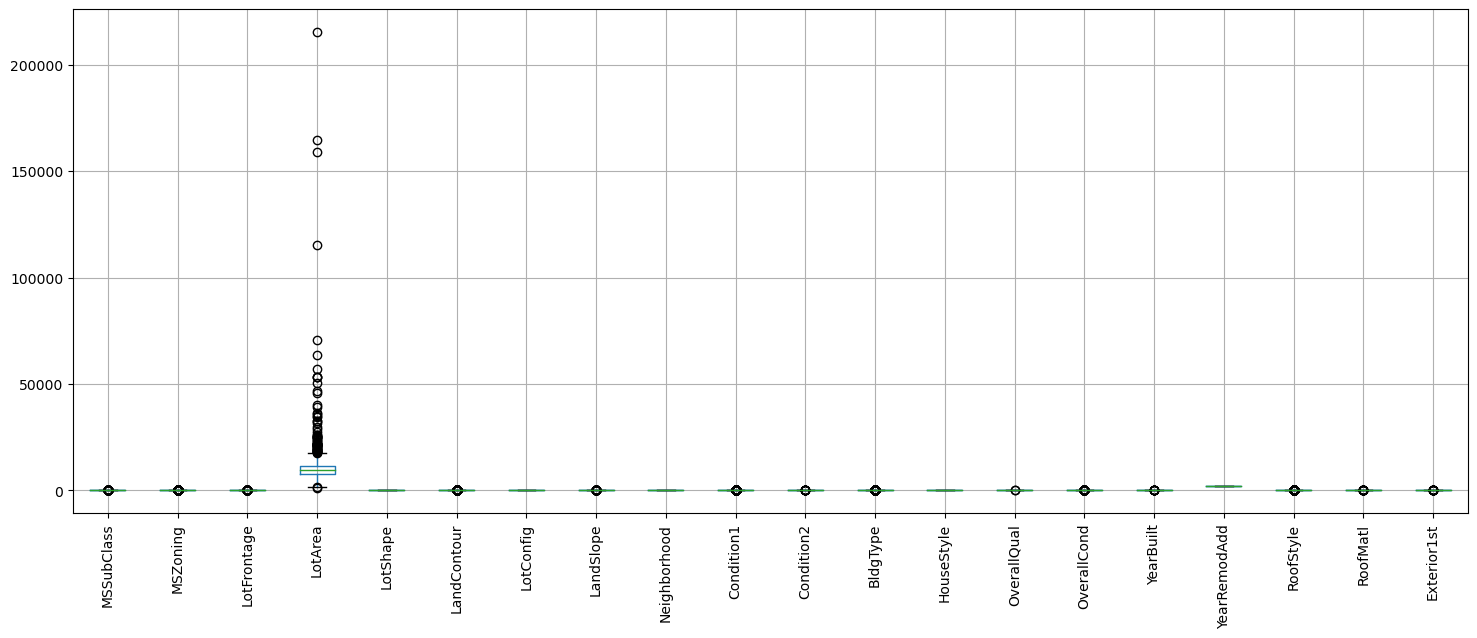

In [116]:
df_concat.iloc[:,0:20].boxplot(figsize=[18,8])
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=90)
plt.show()

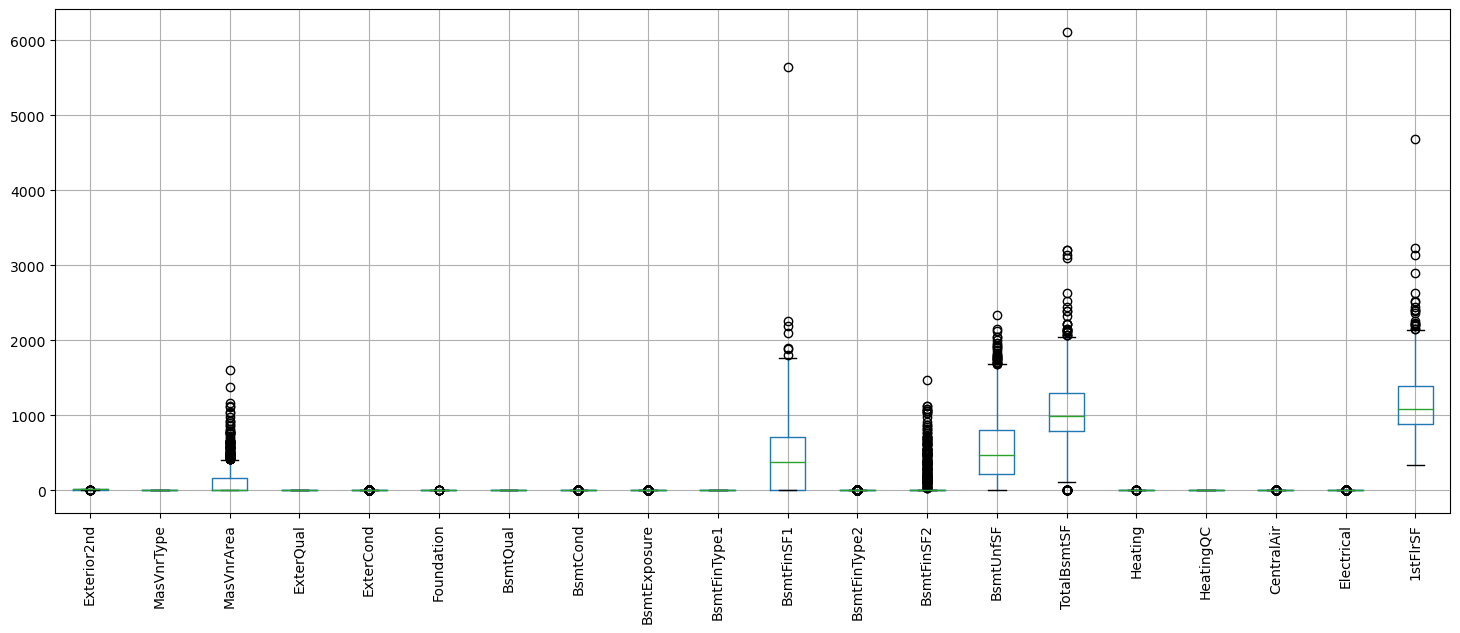

In [117]:
df_concat.iloc[:,20:40].boxplot(figsize=[18,8])
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=90)
plt.show()

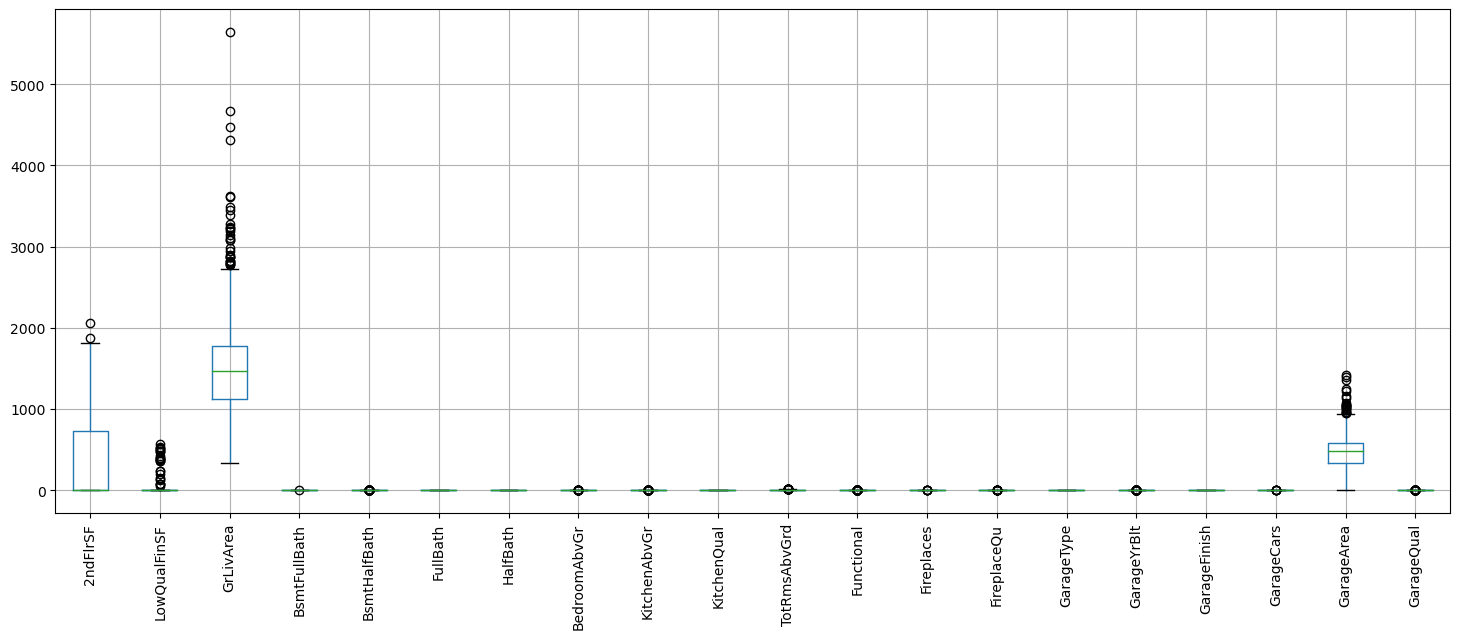

In [118]:
df_concat.iloc[:,40:60].boxplot(figsize=[18,8])
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=90)
plt.show()

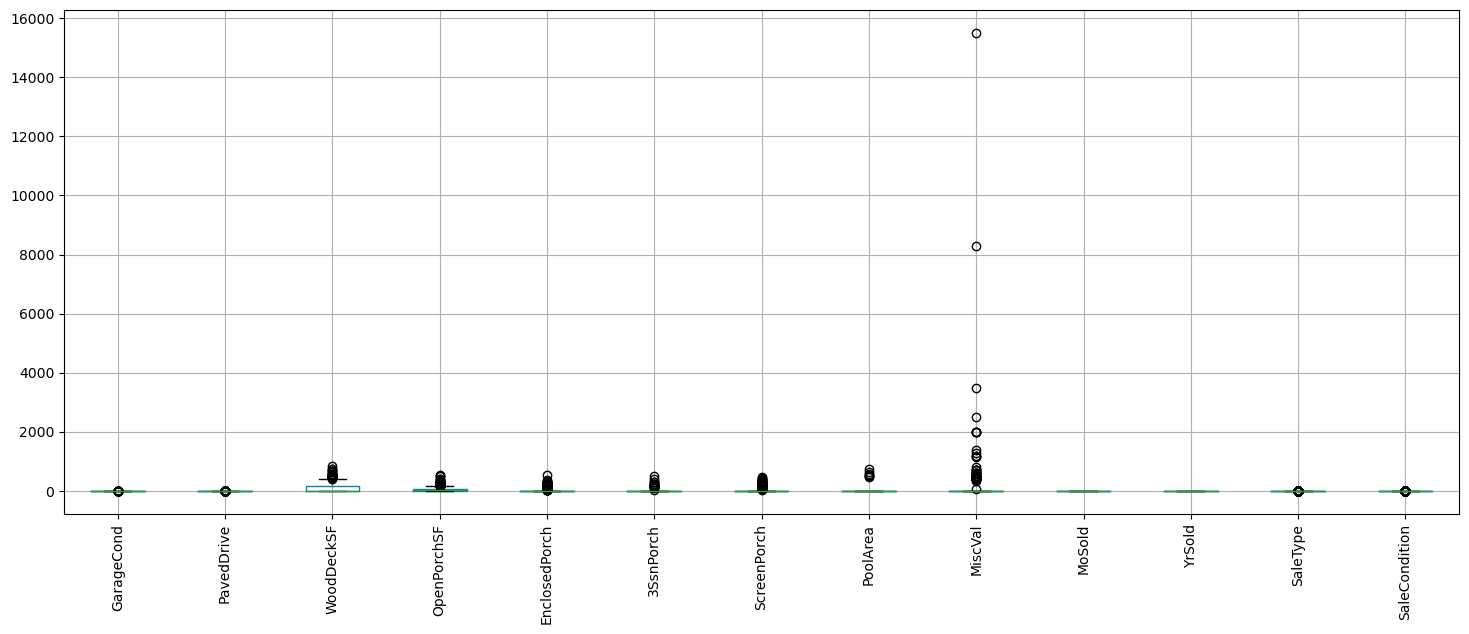

In [119]:
df_concat.iloc[:,60:73].boxplot(figsize=[18,8])
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=90)
plt.show()

It is clear that there are some columns having outliers like MiscVal, GrLiveArea, LowQualityFinSF, GarageArea, TotalBsmtSF, LotArea, MasVsrArea, 1stFlrSF.

# REMOVING THE OUTLIERS

In [120]:
from scipy.stats import zscore
z=np.abs(zscore(df_concat))
df_zscore=df_concat[(z<3).all(axis=1)]

In [121]:
df_zscore.shape

(0, 75)

In [122]:
df_concat.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,dataset_type
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1168.000000,1460.000000
mean,56.897260,3.028767,69.863699,10516.828082,1.942466,2.777397,3.019178,0.062329,12.251370,2.031507,...,3.409589,15.060959,2.758904,43.489041,6.321918,1.815753,7.513014,3.770548,181477.005993,0.200000
std,42.300571,0.632017,22.027677,9981.264932,1.409156,0.707666,1.622634,0.276232,6.013735,0.868515,...,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,1.552100,1.100854,79105.586863,0.400137
min,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,34900.000000,0.000000
25%,20.000000,3.000000,60.000000,7553.500000,0.000000,3.000000,2.000000,0.000000,7.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,8.000000,4.000000,130375.000000,0.000000
50%,50.000000,3.000000,69.000000,9478.500000,3.000000,3.000000,4.000000,0.000000,12.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,8.000000,4.000000,163995.000000,0.000000
75%,70.000000,3.000000,79.000000,11601.500000,3.000000,3.000000,4.000000,0.000000,17.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,3.000000,8.000000,4.000000,215000.000000,0.000000
max,190.000000,4.000000,313.000000,215245.000000,3.000000,3.000000,4.000000,2.000000,24.000000,8.000000,...,508.000000,480.000000,738.000000,15500.000000,12.000000,4.000000,8.000000,5.000000,755000.000000,1.000000


# Splitting of the dataset with TEST and TRAIN data.

In [123]:
df_newtrain=df_concat.loc[df_concat["dataset_type"]==0]
df_newtest=df_concat.loc[df_concat["dataset_type"]==1]

In [124]:
df_newtest.drop(columns=["SalePrice"],inplace=True)

In [125]:
df_newtrain.drop(columns=["dataset_type"],inplace=True)
df_newtest.drop(columns=["dataset_type"],inplace=True)

# SPLITTING OF INDPENDENT AND DEPENDENT VARIABLES

In [126]:
x=df_newtrain.drop(columns=["SalePrice"])
y=df_newtrain[["SalePrice"]]

In the above block of codes we have split the datset which was earlier concatinated in start. Now we need to do x,y split so we have done train and test datset split and x,y split for model process

# REMOVING SKEWNESS

In [127]:
from sklearn.preprocessing import power_transform
df_skew=power_transform(x)
df_skew=pd.DataFrame(df_skew,columns=x.columns)

In [128]:
x=df_skew

In [129]:
x.shape,y.shape

((1168, 73), (1168, 1))

# BEST RANDOM STATE

In [130]:
maximum_accuracy=0
maximum_randomstate=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=(r2_score(y_test,pred))
    if acc>maximum_accuracy:
        maximum_accuracy=acc
        maximum_randomstate=i
print("Best accuracy is"  ,maximum_accuracy , "at random_state:", maximum_randomstate)

Best accuracy is 0.8722552955039279 at random_state: 140


# MODEL BUILDING

In [131]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=maximum_randomstate)

In [132]:
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
print("Coefficient : ",lm.coef_)
print("Intercept   : ",lm.intercept_)
print("Score       : ",lm.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
print("r2 score : ",r2_score(y_test,pred))

Coefficient :  [[-3151.07592101  1145.96209955  -258.88705132  3425.20027321
   -465.11910511  1818.42813591  -519.76131801  1354.75582827
   2600.44115634  -639.40060191 -2108.88411511 -3147.12954008
  -1376.34173903 15212.2079085   4526.2724205   3603.26071939
   1804.88247537  6697.83724161 12375.34014126 -1173.76772179
  -2025.79719646  1602.4099595    253.52334281  4235.37462469
  -1722.95200327  3184.55936518  6763.5802882   -176.10190163
   4190.16010856  2652.93942046   369.00051939  -409.81711899
  -2417.03132003 -7226.46180971 12823.97007801 -1329.39292066
   3348.45638036 -1784.73923178 -2867.92770486  2713.44125126
   1303.70794911 -1083.85323239 14356.33844426  1033.18837635
   -321.04597167  6685.1007742   6119.35810697 -3536.88694056
  -1972.0253165   4713.2938311   5249.22160224  3164.03478403
   5989.98313674  4782.21712753  2634.5430436  -5827.01440827
     19.02409001  9012.39235593  1655.61866705  1964.82213883
   1627.52520866 -1156.21830224  1202.22086987  -297.26

In [133]:
ls=Lasso(alpha=0.0001) 
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print("Coefficient : ",ls.coef_)
print("Intercept   : ",ls.intercept_)
print("Score       : ",ls.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
print("r2 score : ",r2_score(y_test,pred))

Coefficient :  [-3151.07539502  1145.96175213  -258.88686632  3425.20043299
  -465.11847586  1818.4275426   -519.76154561  1354.75542061
  2600.44077235  -639.40022589 -2108.88371255 -3147.12954777
 -1376.34174087 15212.20816351  4526.27199596  3603.25941229
  1804.88155034  6697.83745567 12375.33960348 -1173.76735003
 -2025.79750052  1602.41049365   253.52323686  4235.37490339
 -1722.95154705  3184.55835152  6763.58064396  -176.10145778
  4190.16065828  2652.93884003   369.00170672  -409.90802753
 -2416.9407887  -7226.46056827 12823.96569301 -1329.3927705
  3348.45620398 -1784.73855843 -2867.92738771  2713.44051688
  1303.70460645 -1083.85351292 14356.3424448   1033.18852258
  -321.04553187  6685.10015354  6119.35829469 -3536.88677932
 -1972.02524906  4713.29427305  5249.22076241  3164.03471534
  5989.98243582  4782.21667686  2634.54269486 -5827.0129926
    19.02414954  9012.39197979  1655.61771494  1964.82210102
  1627.52485712 -1156.21800581  1202.22144505  -297.2669896
   394.65143

In [134]:
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
rd.score(x_train,y_train)
print("Coefficient : ",rd.coef_)
print("Intercept   : ",rd.intercept_)
print("Score       : ",rd.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
print("r2 score : ",r2_score(y_test,pred))

Coefficient :  [[-3151.07795171  1145.96246864  -258.88678511  3425.20141544
   -465.11941982  1818.42724208  -519.76171573  1354.75540422
   2600.44134252  -639.40066291 -2108.88345357 -3147.12625087
  -1376.33814122 15212.20691006  4526.27076688  3603.25859155
   1804.88212287  6697.83656244 12375.33826517 -1173.76856305
  -2025.79556334  1602.41047413   253.5235775   4235.37553424
  -1722.95168511  3184.55870041  6763.58146861  -176.10125217
   4190.16056338  2652.93518341   369.01156027  -409.84373684
  -2417.00242901 -7226.45018102 12823.95678321 -1329.39218063
   3348.45652317 -1784.73903405 -2867.92680588  2713.46834243
   1303.73049239 -1083.84916654 14356.30692523  1033.19010681
   -321.04550709  6685.10141938  6119.35902671 -3536.88538074
  -1972.02535265  4713.29451633  5249.22278002  3164.03496248
   5989.98308749  4782.21680187  2634.54227309 -5827.01049397
     19.02596837  9012.38729083  1655.62165818  1964.82166688
   1627.5240105  -1156.21823173  1202.22134588  -297.26

In [135]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
rf.score(x_train,y_train)
#print("Coefficient : ",rf.coef_)
# print("Intercept   : ",rf.intercept_)
print("Score       : ",rf.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
print("r2 score : ",r2_score(y_test,pred))

Score       :  0.9794527232659686
 
error
Mean absolute error    : 17595.477564102566
Mean squared error     : 650645825.2262834
Root mean squared error: 25507.760098179602
 
r2 score :  0.8798473345196554


In [136]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
gbr.score(x_train,y_train)
print("Score       : ",gbr.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
print("r2 score : ",r2_score(y_test,pred))

Score       :  0.9719628188682605
 
error
Mean absolute error    : 15483.628113657714
Mean squared error     : 489131049.4253664
Root mean squared error: 22116.30731893022
 
r2 score :  0.9096737471000961


In [137]:
adb=AdaBoostRegressor()
adb.fit(x_train,y_train)
pred=adb.predict(x_test)
adb.score(x_train,y_train)
print("Score       : ",adb.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
print("r2 score : ",r2_score(y_test,pred))

Score       :  0.8682107470707201
 
error
Mean absolute error    : 25107.93936318815
Mean squared error     : 1024708961.989459
Root mean squared error: 32011.07561437852
 
r2 score :  0.8107703018277092


# PREDICTION

In [138]:
pred=lm.predict(x_test)
print("Predicted Price : ", pred)
print("Actual Price :", y_test)

Predicted Price :  [[106557.26689532]
 [224694.55622322]
 [288445.33519199]
 [148405.25894182]
 [283694.58635267]
 [228096.02038076]
 [138853.73274672]
 [385966.95374243]
 [174742.27784002]
 [139552.53384211]
 [ 51874.88586217]
 [144547.4129417 ]
 [ 81781.32900483]
 [203013.51616785]
 [299486.49316104]
 [171756.53561825]
 [270091.6874751 ]
 [283362.60192244]
 [179522.57884293]
 [218851.31235321]
 [115401.13173142]
 [122131.30448804]
 [290720.08870762]
 [146345.96484986]
 [338690.78655474]
 [289778.61104767]
 [118954.27497417]
 [195439.9586481 ]
 [160776.34712573]
 [214268.40382361]
 [128035.60613993]
 [197412.55000173]
 [ 59133.75904452]
 [216621.23891319]
 [168966.14019315]
 [266199.26661624]
 [-14766.16596536]
 [268587.42786487]
 [246467.72444051]
 [108118.12921031]
 [171842.9074225 ]
 [198075.1401714 ]
 [107035.21053637]
 [212803.89628927]
 [223967.76722199]
 [238864.15407168]
 [ 90770.24741431]
 [316790.85708515]
 [175360.32636891]
 [ 79765.57932968]
 [113418.6187187 ]
 [211613.849

# CROSS VALIDATION SCORE OF MODELS

In [139]:
scr=cross_val_score(lm,x,y,cv=5,scoring="r2")
print("Cross Validation Score of LinearRegression Model is : ", scr.mean())

Cross Validation Score of LinearRegression Model is :  0.6941501618681617


In [140]:
scr=cross_val_score(ls,x,y,cv=5,scoring="r2")
print("Cross Validation Score of Lasso Model is : ", scr.mean())

Cross Validation Score of Lasso Model is :  0.7512220266853877


In [141]:
scr=cross_val_score(rd,x,y,cv=5,scoring="r2")
print("Cross Validation Score of RidgeRegression Model is : ", scr.mean())

Cross Validation Score of RidgeRegression Model is :  0.6953426837794887


In [142]:
scr=cross_val_score(rf,x,y,cv=5,scoring="r2")
print("Cross Validation Score of RandomForestRegressor Model is : ", scr.mean())

Cross Validation Score of RandomForestRegressor Model is :  0.8505768365647975


In [143]:
scr=cross_val_score(gbr,x,y,cv=5,scoring='r2')
print("Cross Validation Score of GradientBoostingRegressor Model is : ", scr.mean())

Cross Validation Score of GradientBoostingRegressor Model is :  0.8686957261654001


In [144]:
scr=cross_val_score(adb,x,y,cv=5,scoring="r2")
print("Cross Validation Score of AdaBoostRegressor Model is : ", scr.mean())

Cross Validation Score of AdaBoostRegressor Model is :  0.8052613860701978


# HYPER PARAMETER TUNING

In [145]:
parameters={'learning_rate':[0.01,0.02,0.03,0.04],
                  'subsample':[0.9, 0.5, 0.2, 0.1],
                  'n_estimators':[100,500,1000, 1500]}

In [146]:
gcv=GridSearchCV(GradientBoostingRegressor(), parameters,cv=5,scoring="r2")

In [147]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]},
             scoring='r2')

In [148]:
gcv.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000, 'subsample': 0.1}

In [149]:
model=GradientBoostingRegressor(learning_rate=0.04,n_estimators=100,subsample= 0.1,random_state=maximum_randomstate)
model.fit(x_train,y_train)
pred=model.predict(x_test)
print(r2_score(y_test,pred)*100)

89.3167384509258


The gradient boosting regressor is performing best with accuracy of 89.31% so i am saving it as the final model.

# Saving the model

In [150]:
import joblib
joblib.dump(model,"House sales price prediction.pkl")

['House sales price prediction.pkl']

In [151]:
joblib.load('House sales price prediction.pkl')

GradientBoostingRegressor(learning_rate=0.04, random_state=140, subsample=0.1)

In [152]:
prediction=model.predict(x_test)

In [153]:
print(r2_score(y_test,prediction)*100)

89.3167384509258


In [154]:
prediction=pd.DataFrame(prediction)

In [155]:
prediction

,0
0,126499.734318
1,225877.786511
2,308251.523879
3,116206.002381
4,286380.574670
...,...
229,147595.225402
230,122208.192225
231,215507.760685
232,153755.220100


# >>>>>>>>>DONE<<<<<<<<<